# Module 2 Code

This is main code for Module 2

Please run the code line by line

Main code edited by ENZE WANG

Fix by CHENYANG JIANG, HanGyu KANG and RUI HUANG

HanGyu KANG edited the PCA model build

CHENYANG JIANG edited BOXCOX and Lasso Regression Part 

Table of Contents:

1. Clean Part

2. Model Build

3. Model Diagnosis


We require the following packages:

In [1]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}

Loading required package: ggplot2

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.0-2

Loading required package: grid

Loading required package: gridExtra

Loading required package: car

Loading required package: carData

Loading required package: corrplot

corrplot 0.84 loaded

Loading required package: leaps

Loading required package: caret

Loading required package: lattice



Please put the Module2.ipynb into the main Folder and run it instead of in Code Folder, or it may not find the BodyFat.csv

## Clean Part

Read the BodyFat.csv

In [3]:
RawData = read.csv("Data/BodyFat.csv",sep=",")
RawDataFrame=data.frame(RawData)

Look what our data looks like

In [4]:
head(RawData)
tail(RawData)
dim(RawData)
colnames(RawData)
summary(RawData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
247,247,29.1,1.0308,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,252,30.7,1.0271,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


[1] 252  17

[1] "IDNO"      "BODYFAT"   "DENSITY"   "AGE"       "WEIGHT"    "HEIGHT"   
 [7] "ADIPOSITY" "NECK"      "CHEST"     "ABDOMEN"   "HIP"       "THIGH"    
[13] "KNEE"      "ANKLE"     "BICEPS"    "FOREARM"   "WRIST"

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

The following part will use ggplot to study our data, we highly recommend you to check line by line to plot pictures you want, there are so many plot. 

### Histogram of all variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



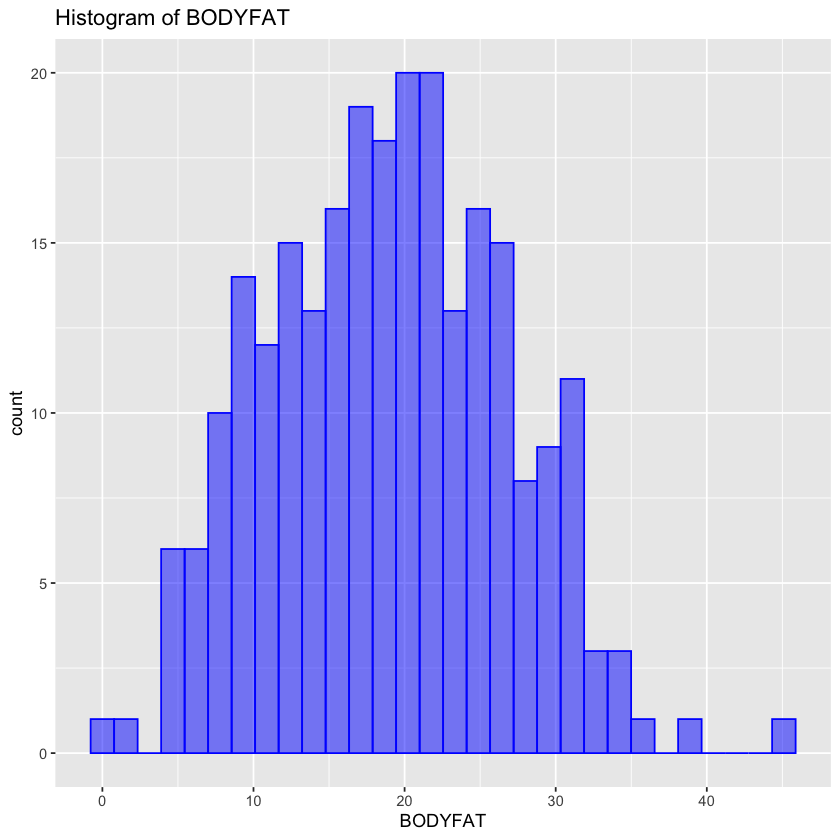

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



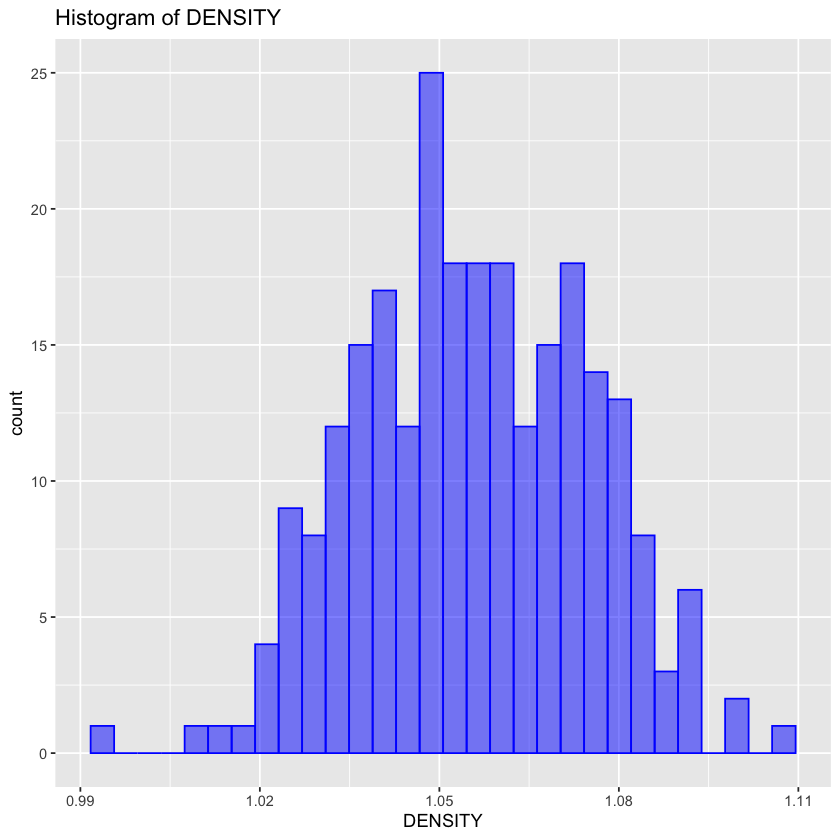

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



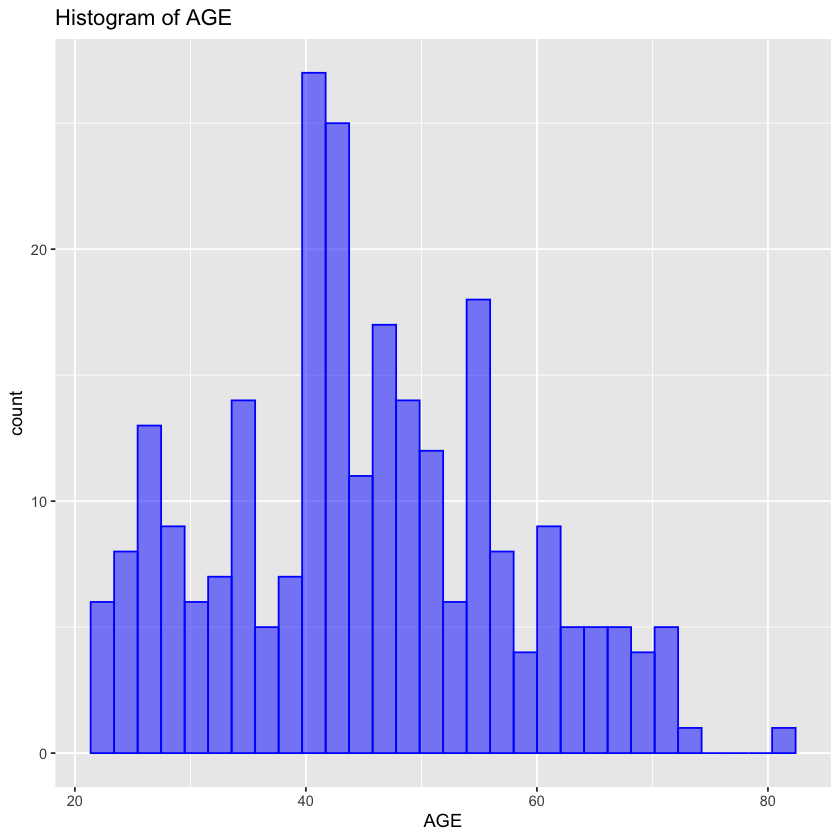

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



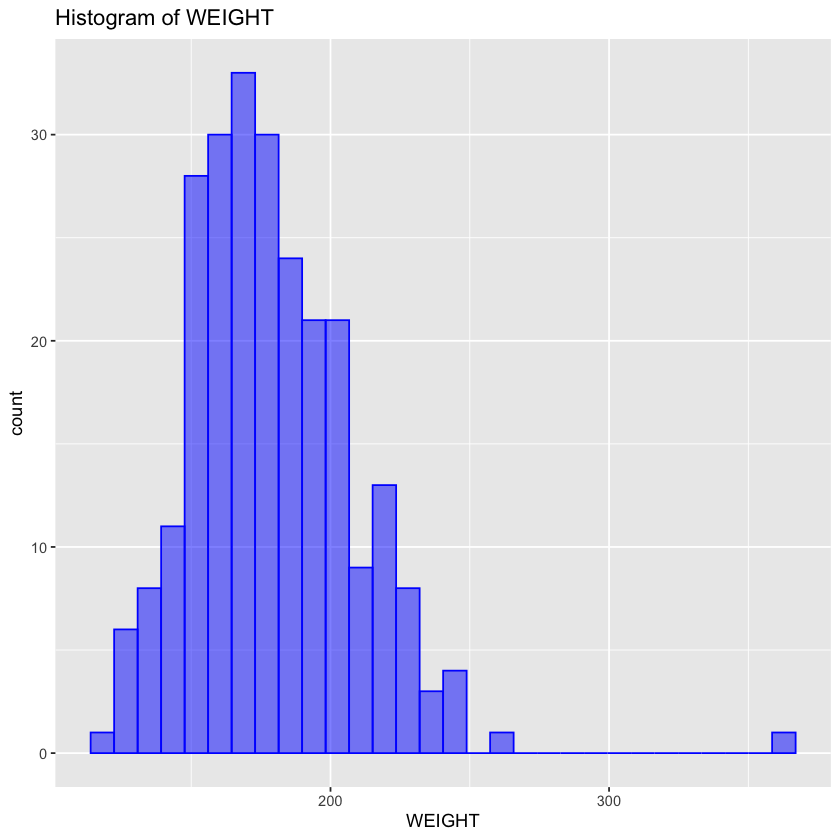

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



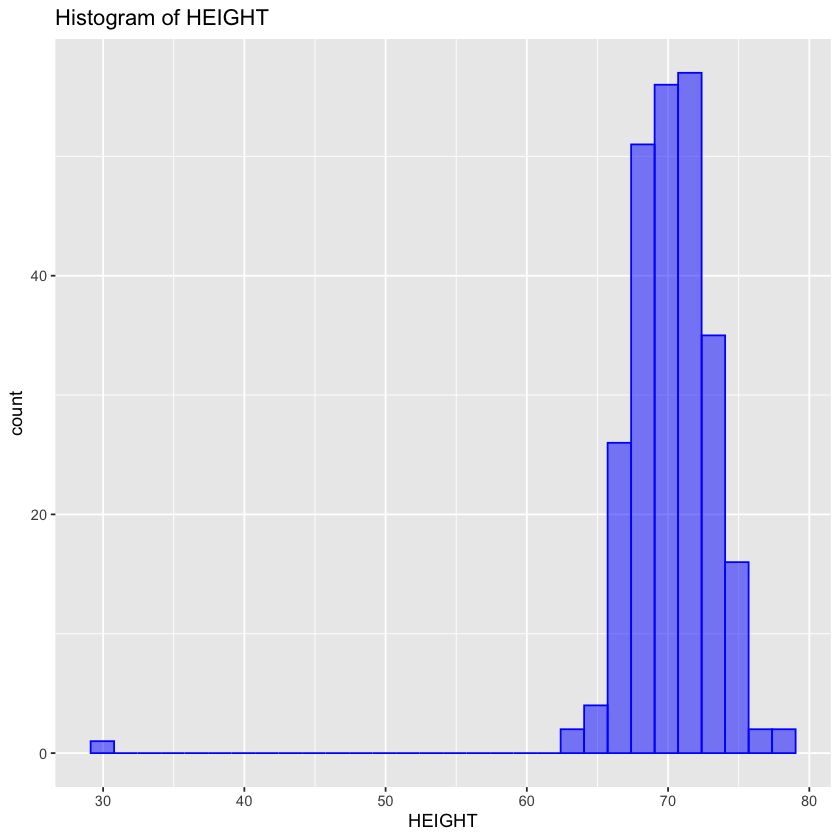

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



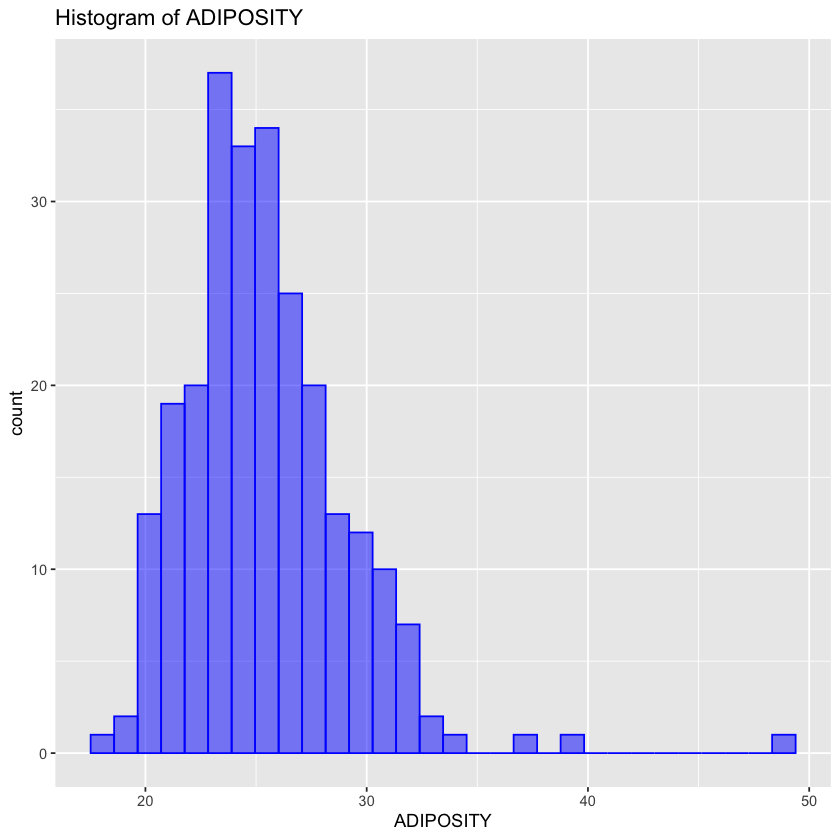

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



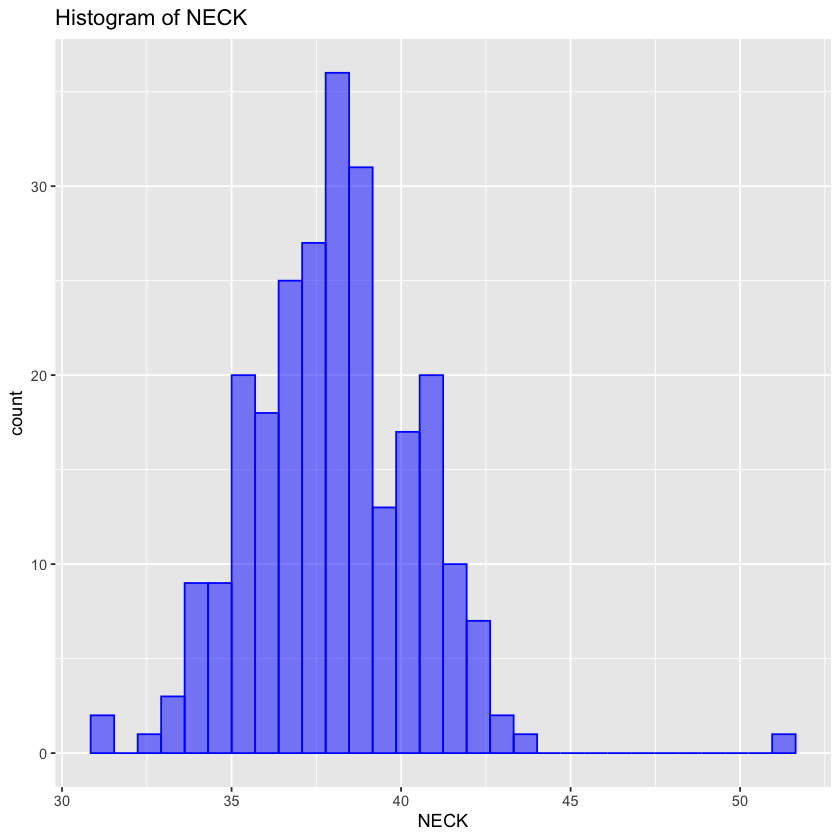

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



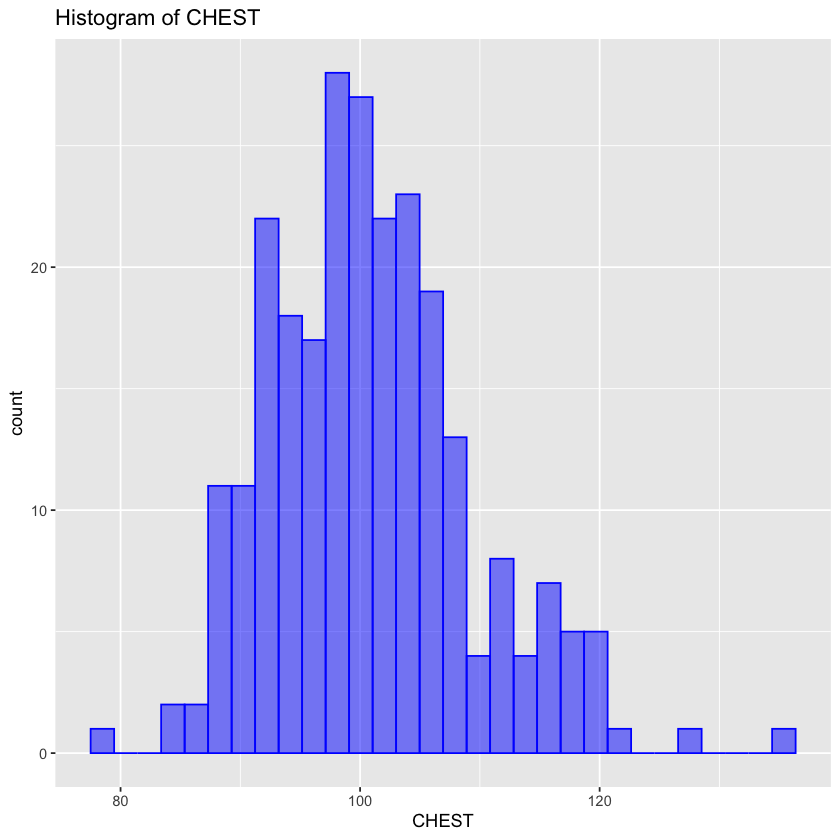

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



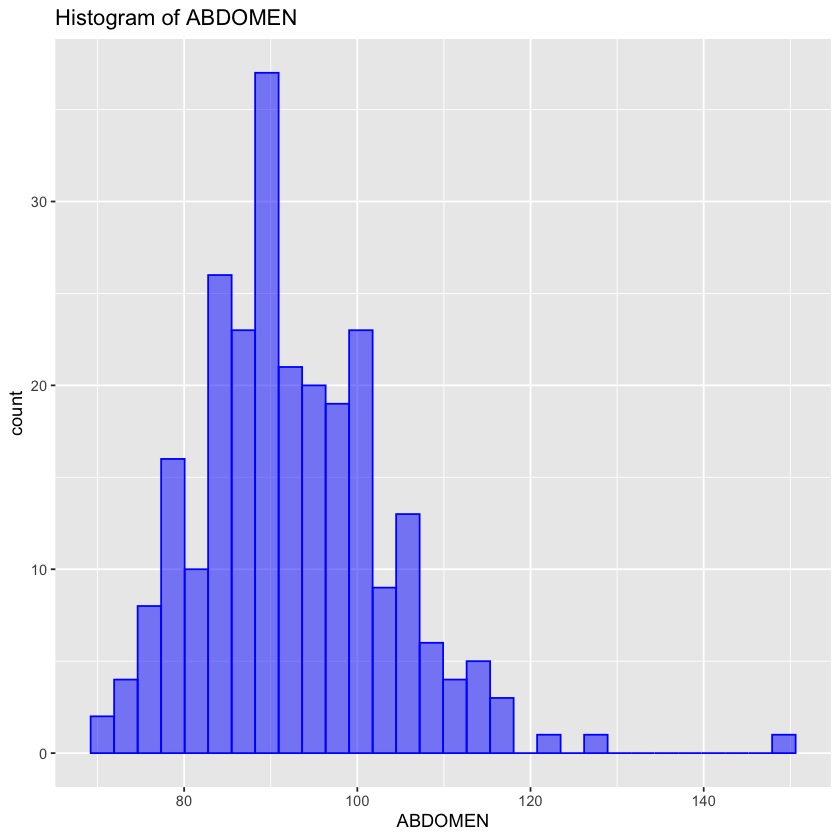

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



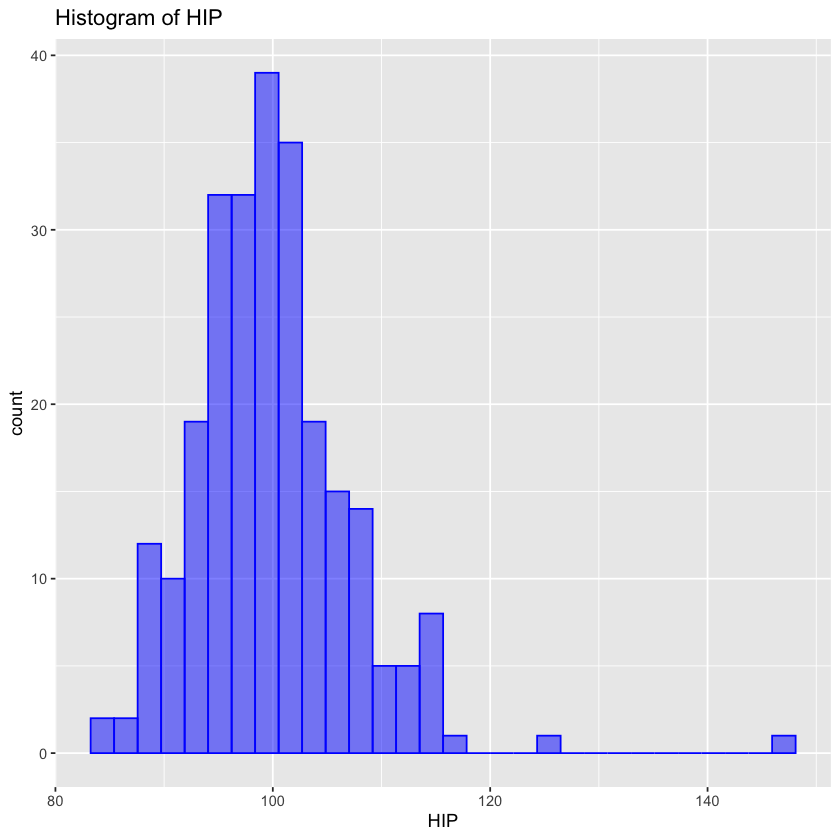

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



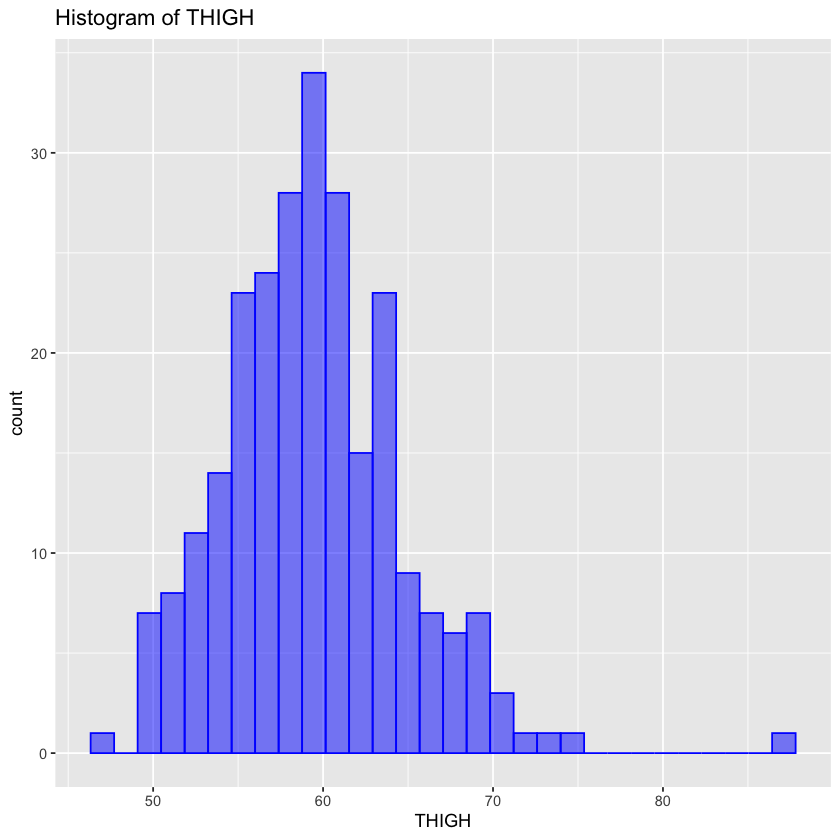

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



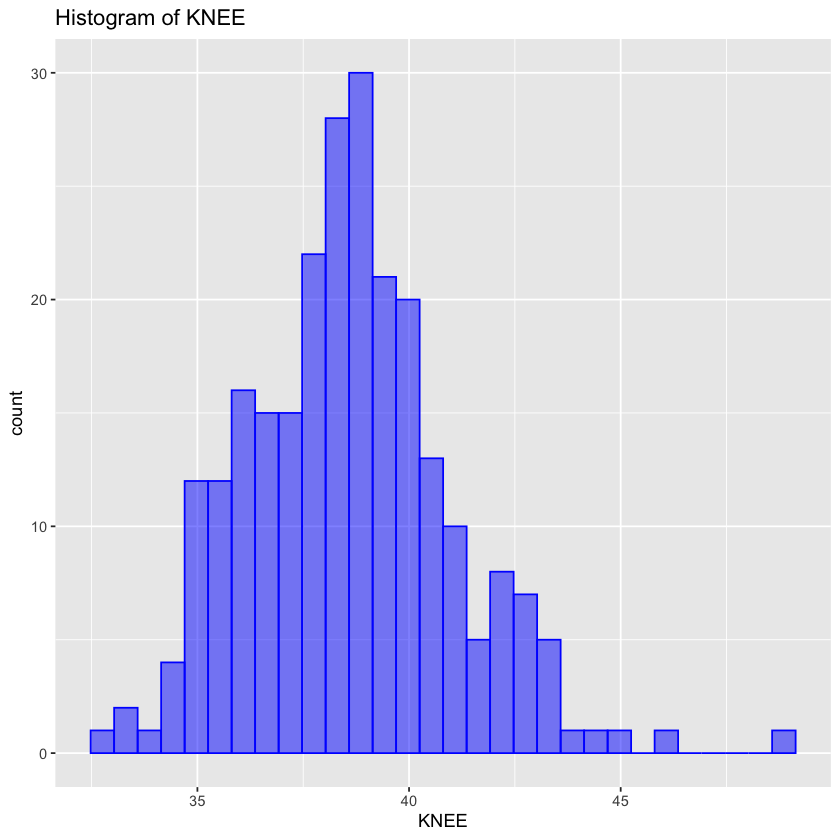

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



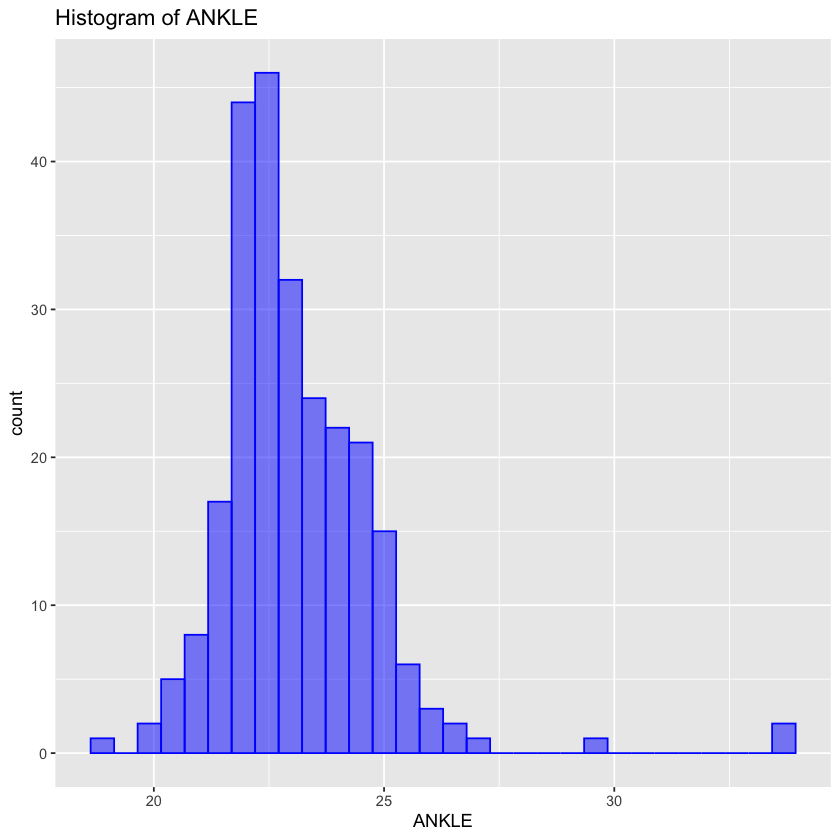

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



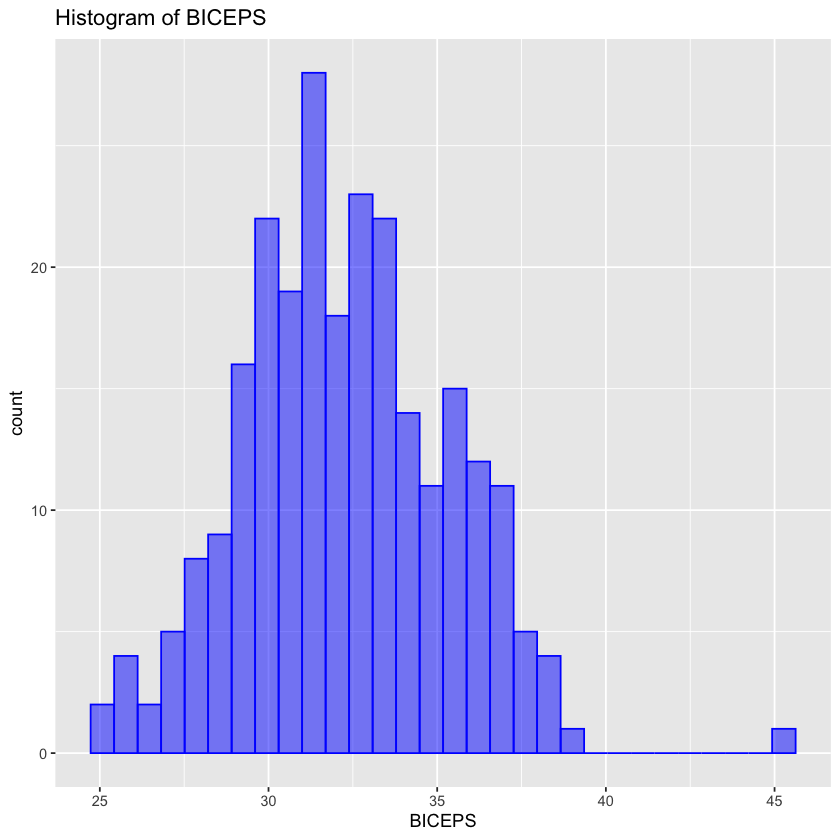

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



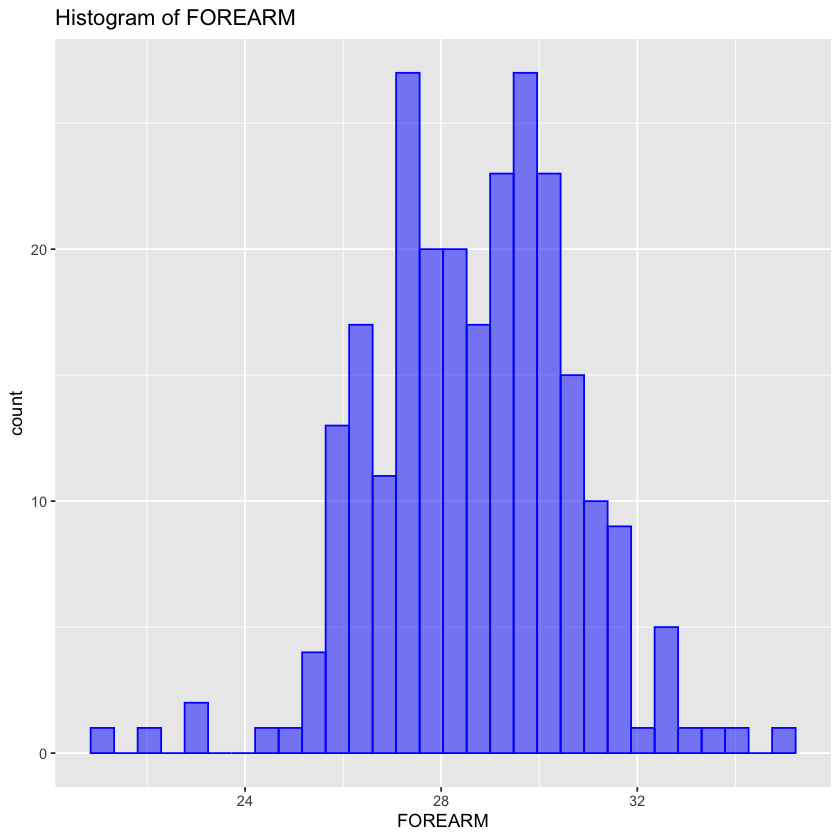

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



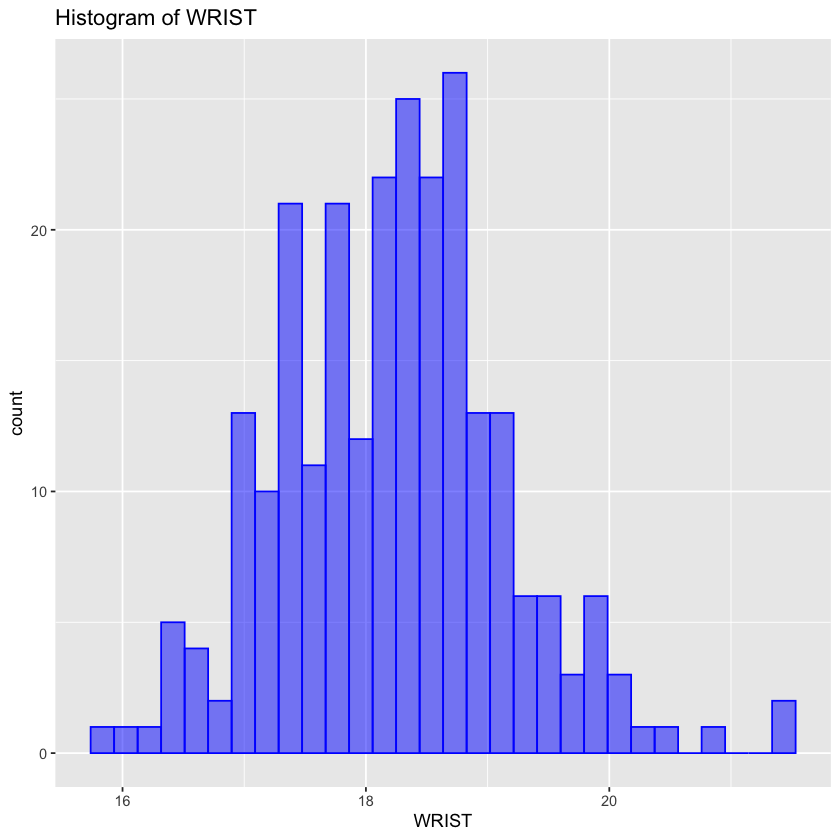

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



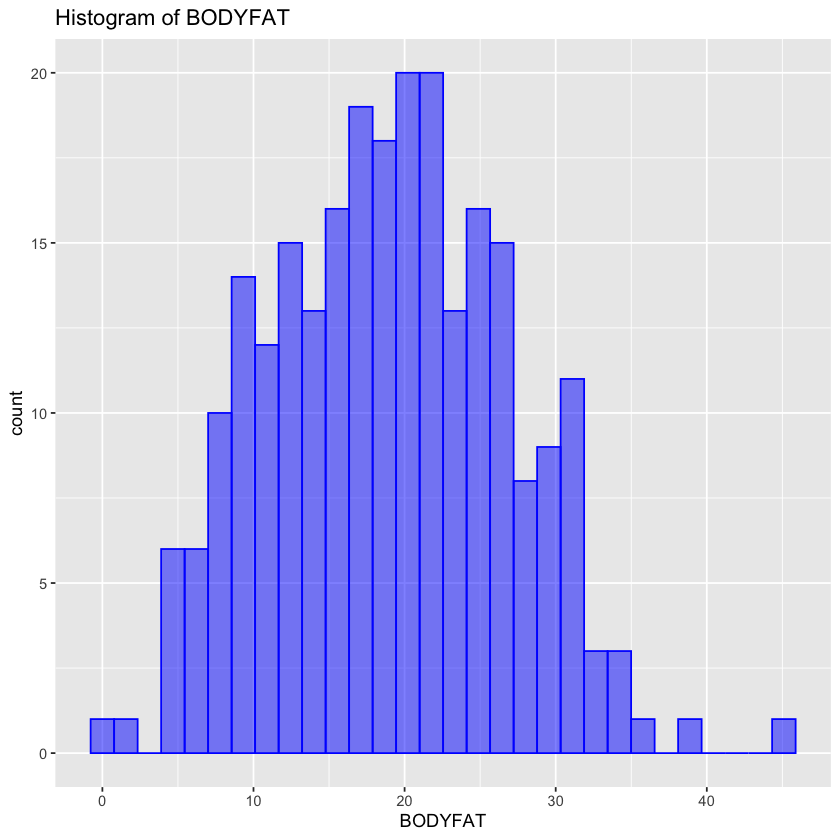

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



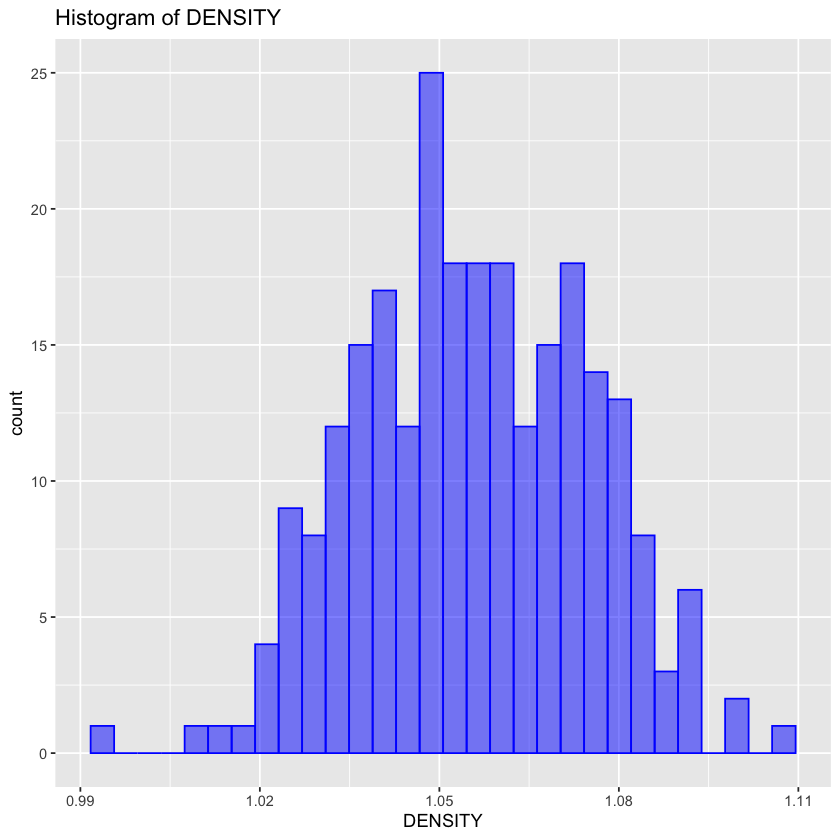

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



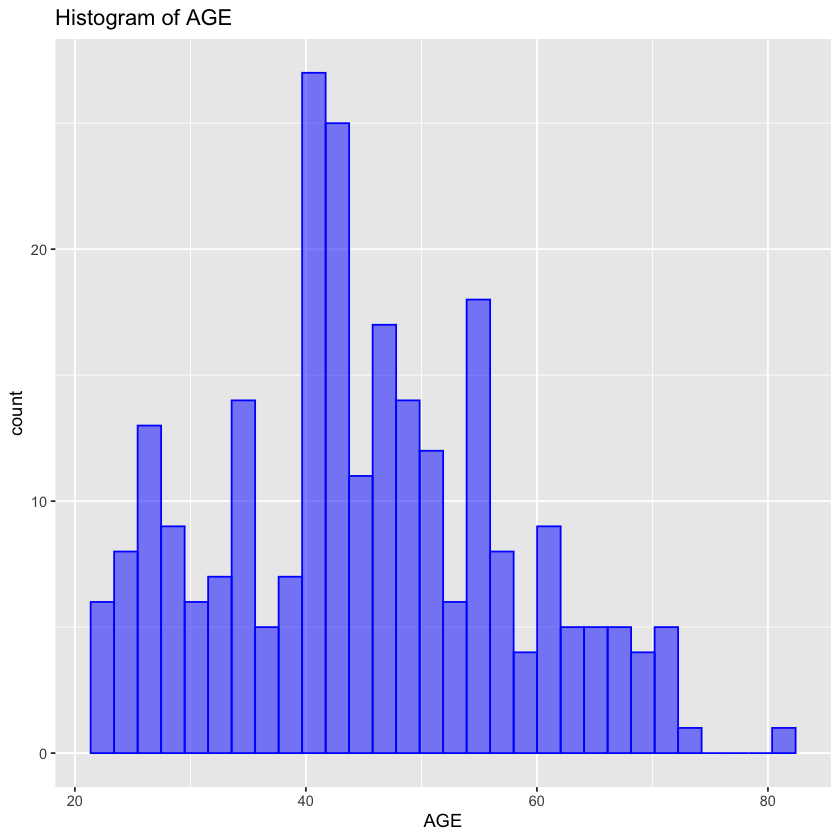

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



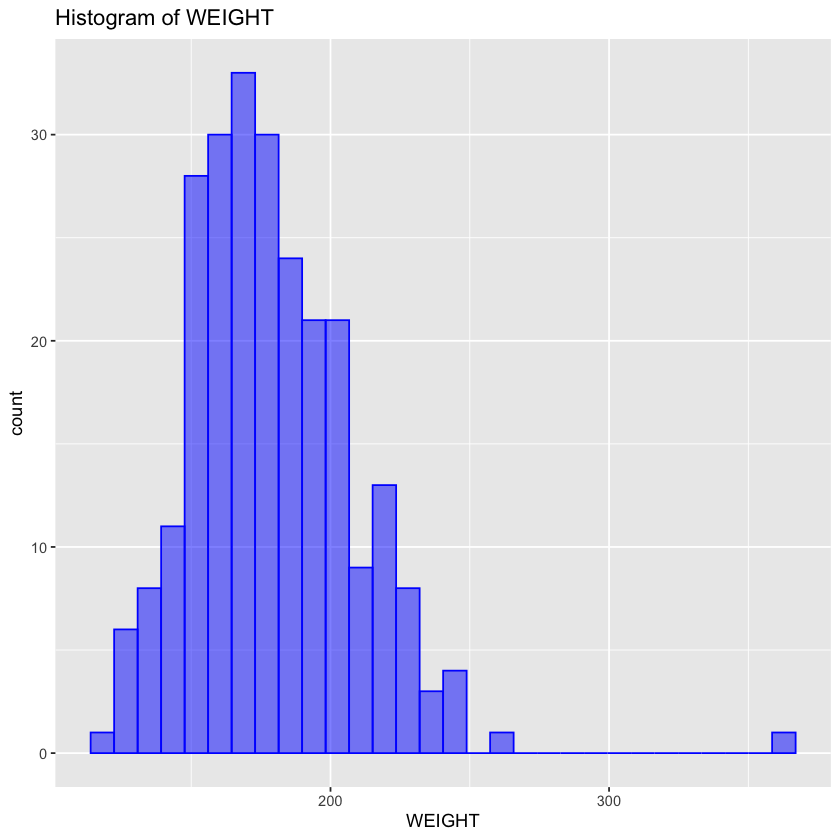

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



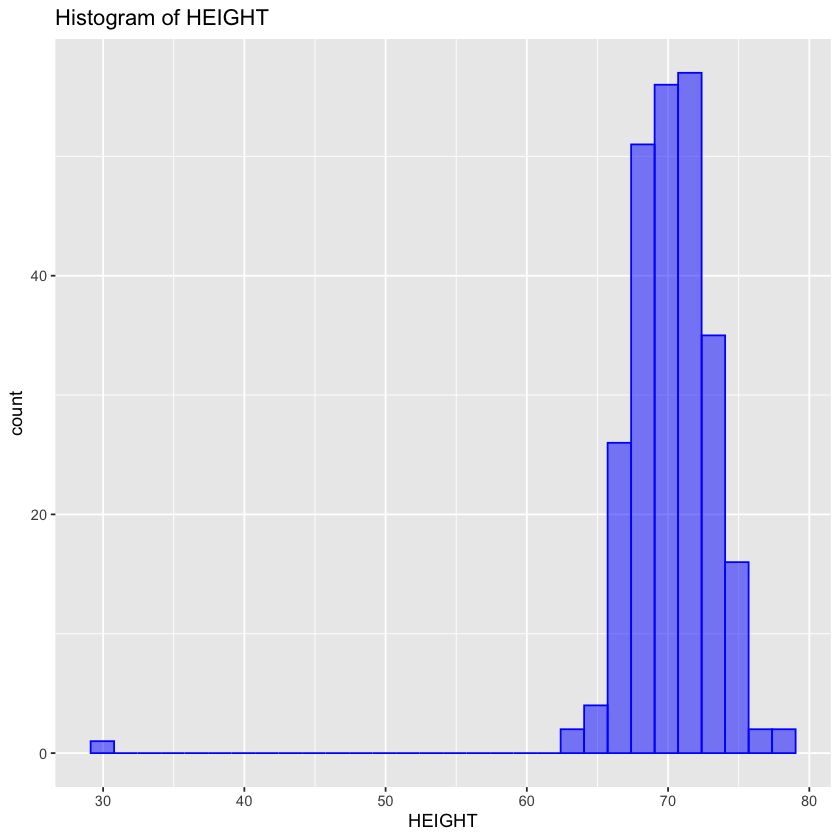

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



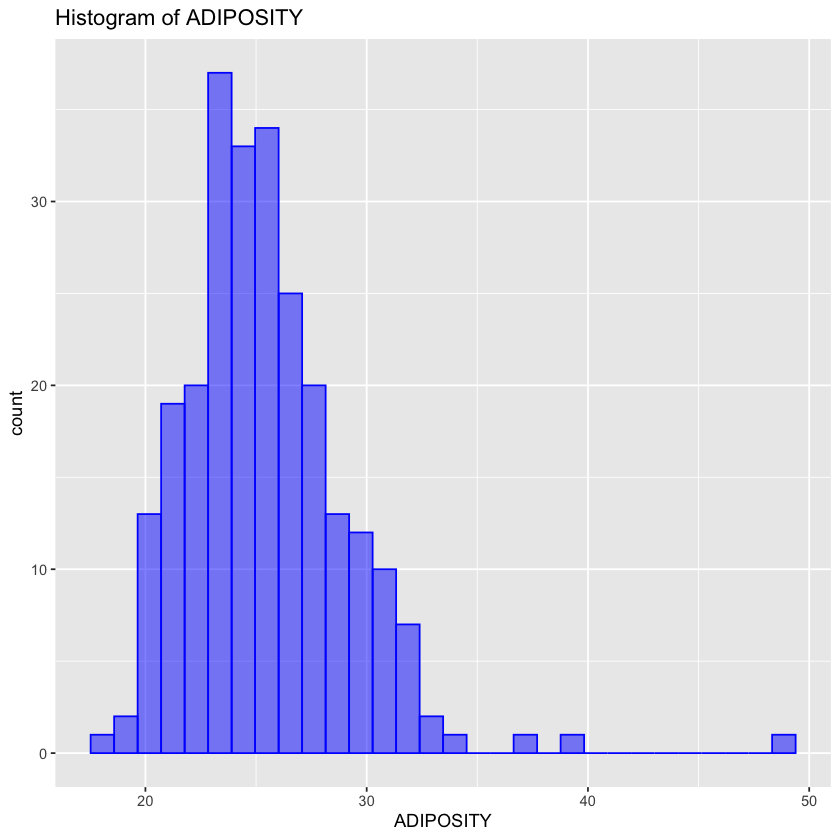

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



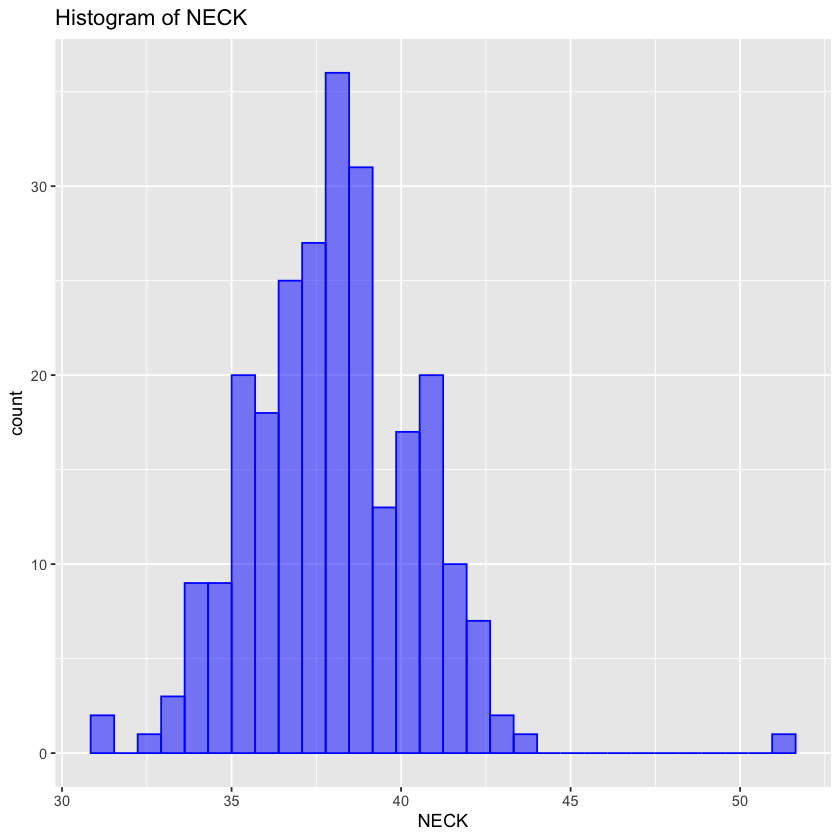

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



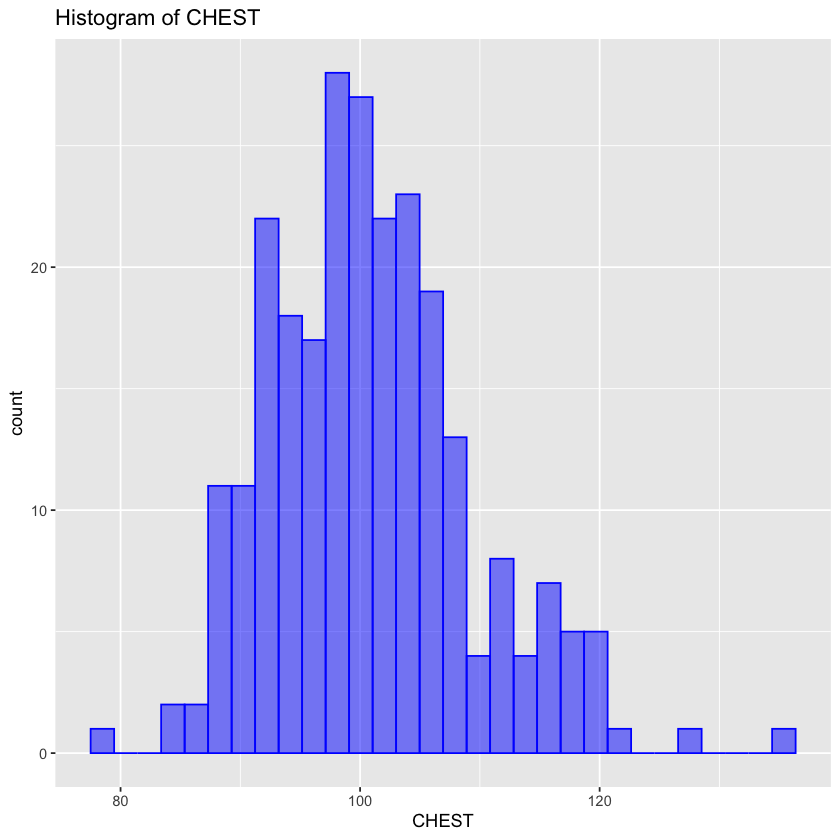

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



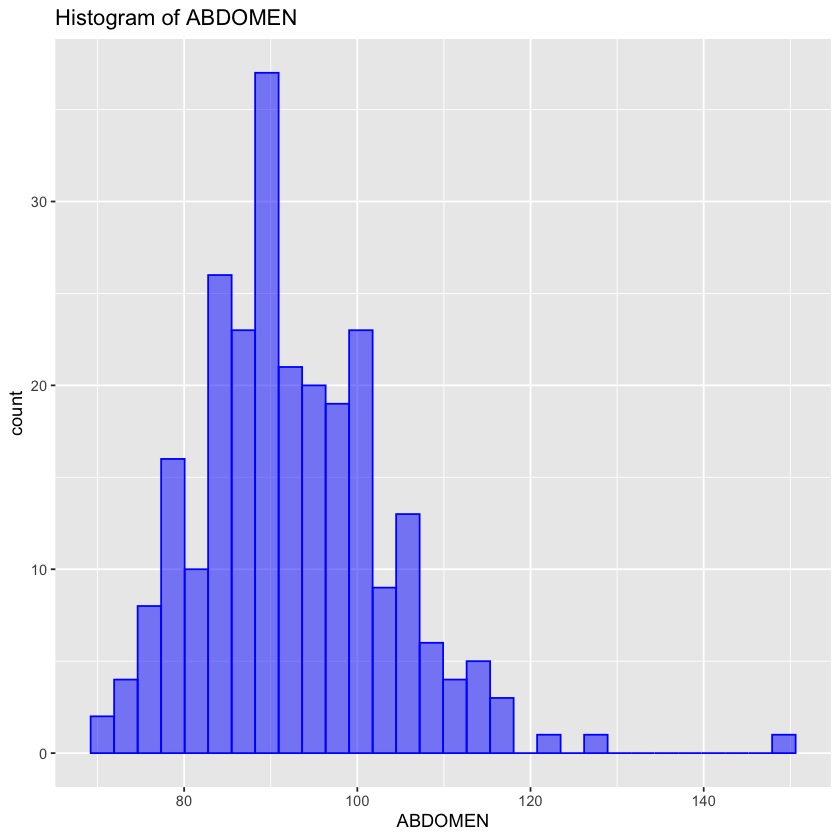

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



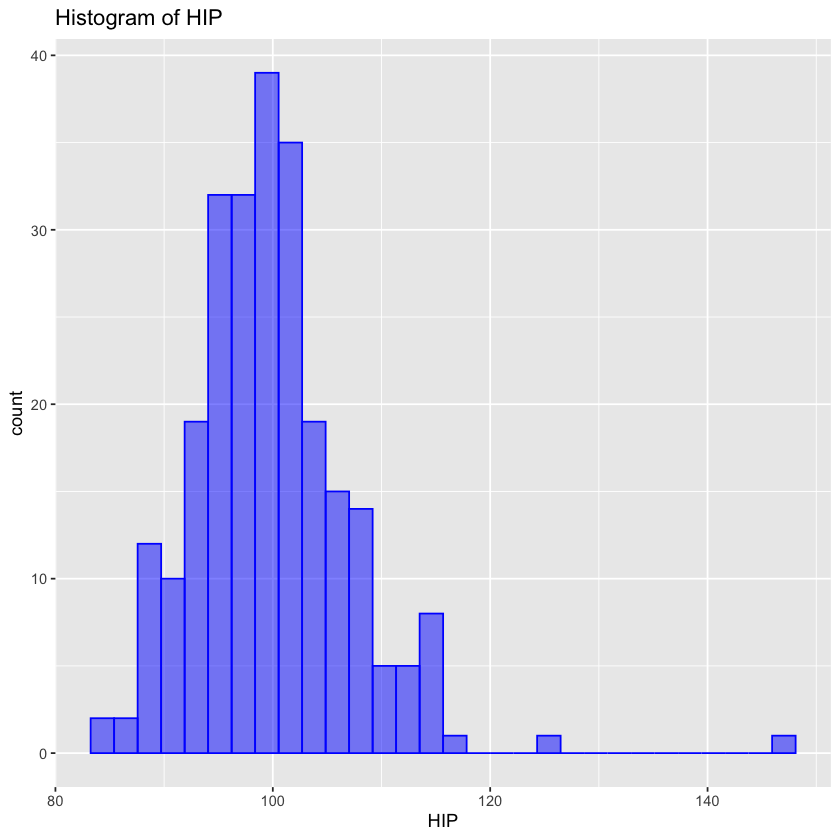

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



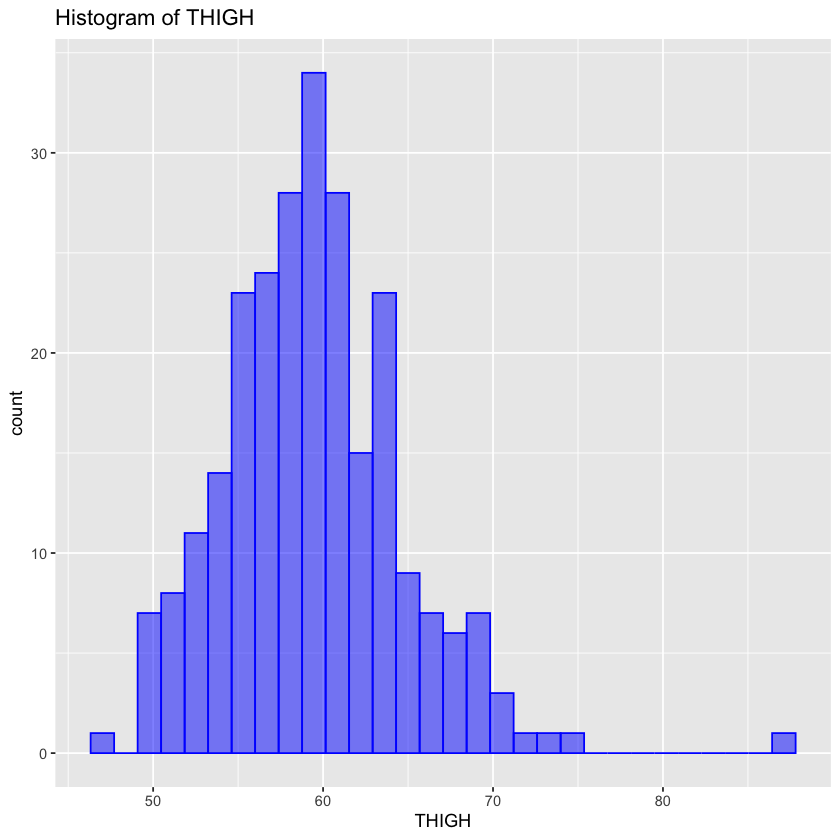

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



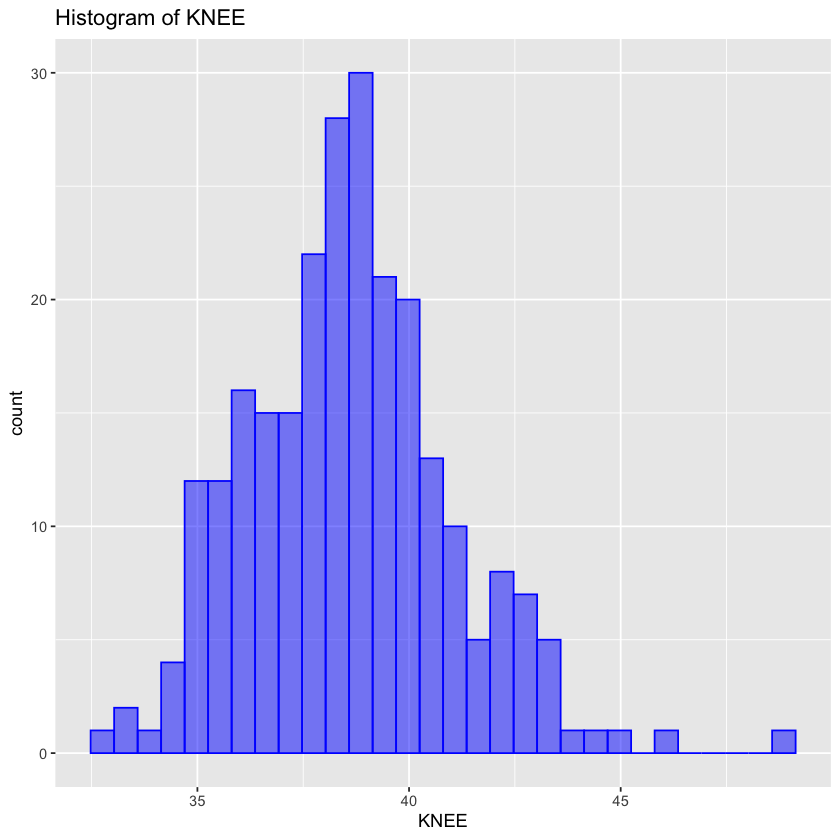

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



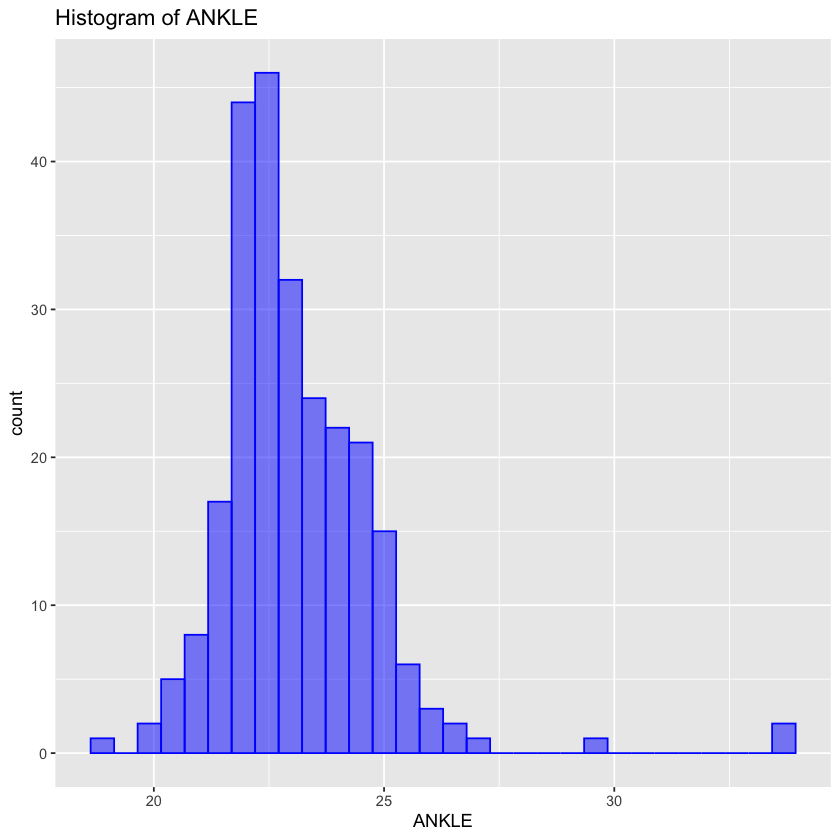

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



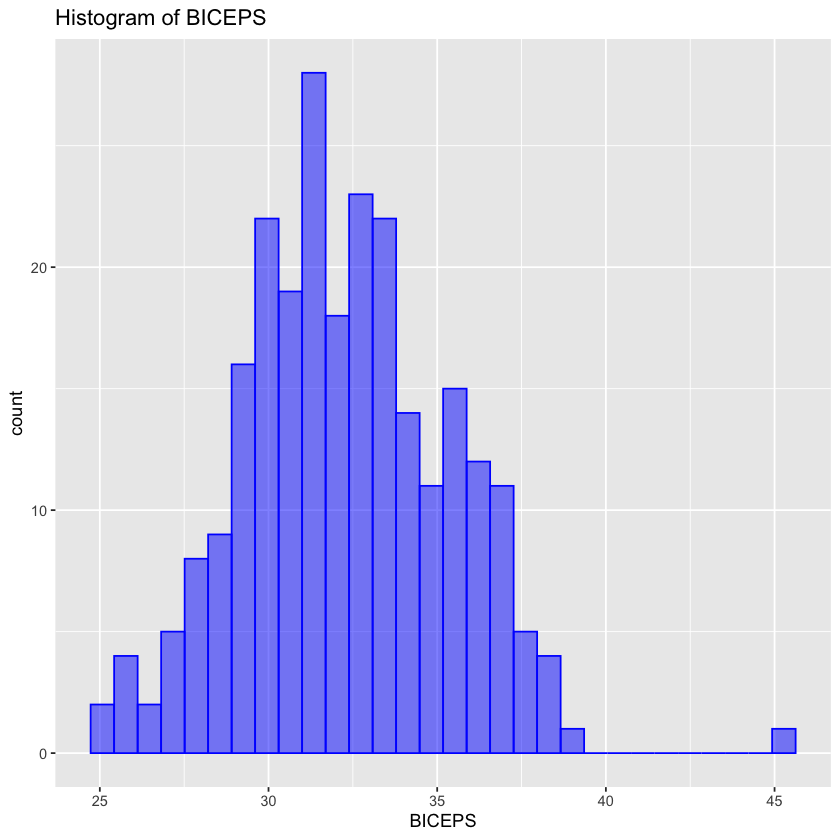

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



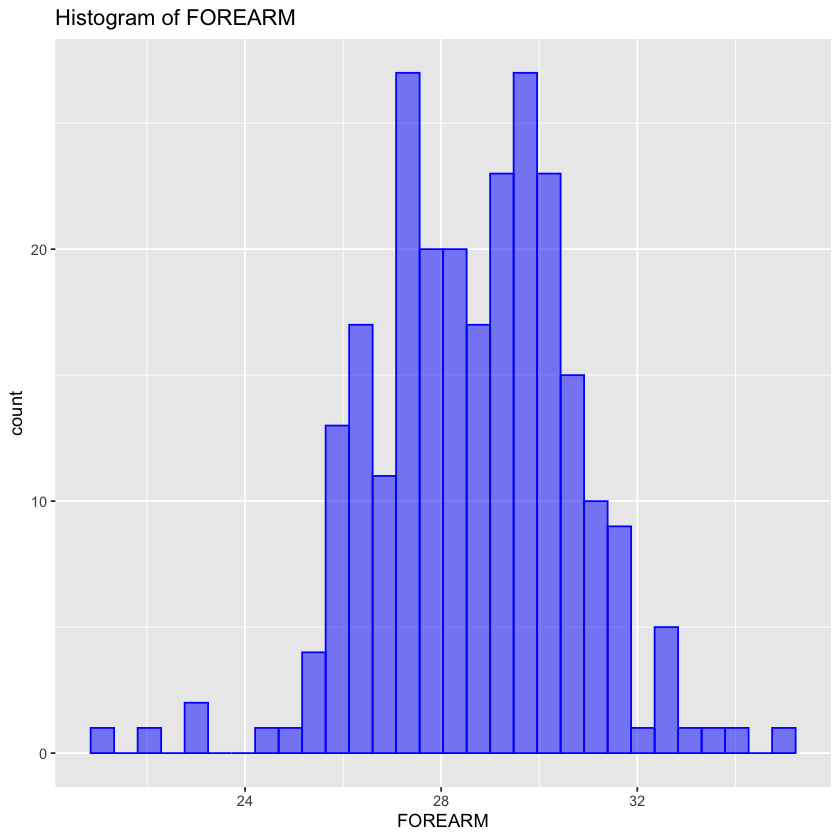

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



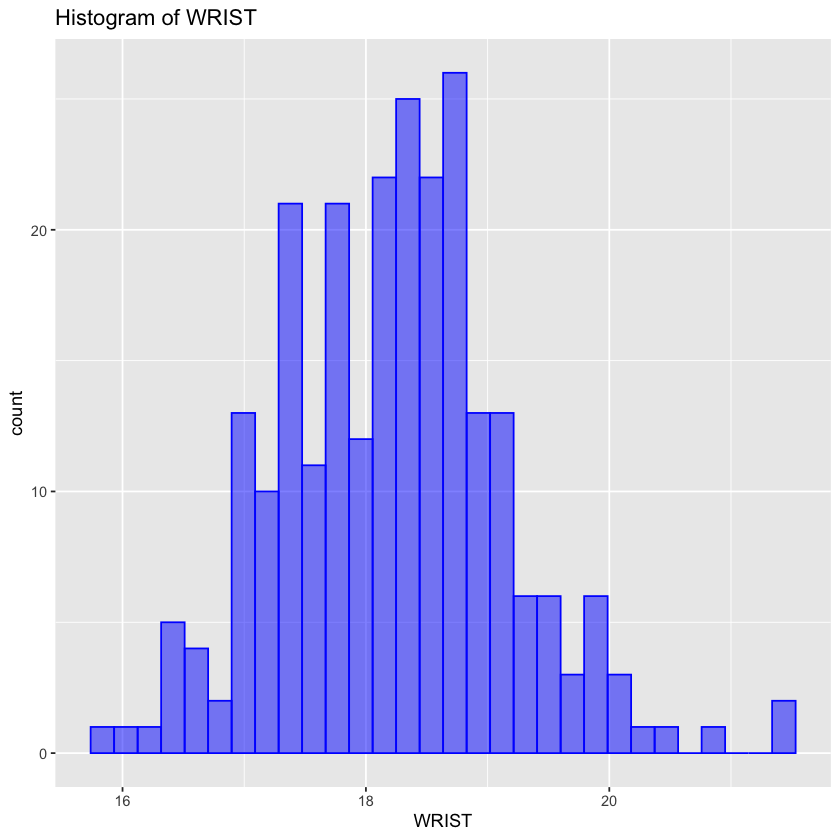

In [6]:
ggplot(RawDataFrame, aes(x=BODYFAT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BODYFAT")
ggplot(RawDataFrame, aes(x=DENSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of DENSITY")
ggplot(RawDataFrame, aes(x=AGE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of AGE")
ggplot(RawDataFrame, aes(x=WEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WEIGHT")
ggplot(RawDataFrame, aes(x=HEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HEIGHT")
ggplot(RawDataFrame, aes(x=ADIPOSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ADIPOSITY")
ggplot(RawDataFrame, aes(x=NECK))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of NECK")
ggplot(RawDataFrame, aes(x=CHEST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of CHEST")
ggplot(RawDataFrame, aes(x=ABDOMEN))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ABDOMEN")
ggplot(RawDataFrame, aes(x=HIP))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HIP")
ggplot(RawDataFrame, aes(x=THIGH))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of THIGH")
ggplot(RawDataFrame, aes(x=KNEE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of KNEE")
ggplot(RawDataFrame, aes(x=ANKLE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ANKLE")
ggplot(RawDataFrame, aes(x=BICEPS))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BICEPS")
ggplot(RawDataFrame, aes(x=FOREARM))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of FOREARM")
ggplot(RawDataFrame, aes(x=WRIST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WRIST")

ggplot(RawDataFrame, aes(x=BODYFAT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BODYFAT")
ggsave("Image/BODYFAT_His.jpeg")
ggplot(RawDataFrame, aes(x=DENSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of DENSITY")
ggsave("Image/DENSITY_His.jpeg")
ggplot(RawDataFrame, aes(x=AGE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of AGE")
ggsave("Image/AGE_His.jpeg")
ggplot(RawDataFrame, aes(x=WEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WEIGHT")
ggsave("Image/WEIGHT_His.jpeg")
ggplot(RawDataFrame, aes(x=HEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HEIGHT")
ggsave("Image/HEIGHT_His.jpeg")
ggplot(RawDataFrame, aes(x=ADIPOSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ADIPOSITY")
ggsave("Image/ADIPOSITY_His.jpeg")
ggplot(RawDataFrame, aes(x=NECK))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of NECK")
ggsave("Image/NECK_His.jpeg")
ggplot(RawDataFrame, aes(x=CHEST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of CHEST")
ggsave("Image/CHEST_His.jpeg")
ggplot(RawDataFrame, aes(x=ABDOMEN))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ABDOMEN")
ggsave("Image/ABDOMEN_His.jpeg")
ggplot(RawDataFrame, aes(x=HIP))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HIP")
ggsave("Image/HIP_His.jpeg")
ggplot(RawDataFrame, aes(x=THIGH))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of THIGH")
ggsave("Image/THIGH_His.jpeg")
ggplot(RawDataFrame, aes(x=KNEE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of KNEE")
ggsave("Image/KNEE_His.jpeg")
ggplot(RawDataFrame, aes(x=ANKLE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ANKLE")
ggsave("Image/ANKLE_His.jpeg")
ggplot(RawDataFrame, aes(x=BICEPS))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BICEPS")
ggsave("Image/BICEPS_His.jpeg")
ggplot(RawDataFrame, aes(x=FOREARM))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of FOREARM")
ggsave("Image/FOREARM_His.jpeg")
ggplot(RawDataFrame, aes(x=WRIST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WRIST")
ggsave("Image/WRIST_His.jpeg")

### Boxplot of all variables

Saving 7 x 7 in image



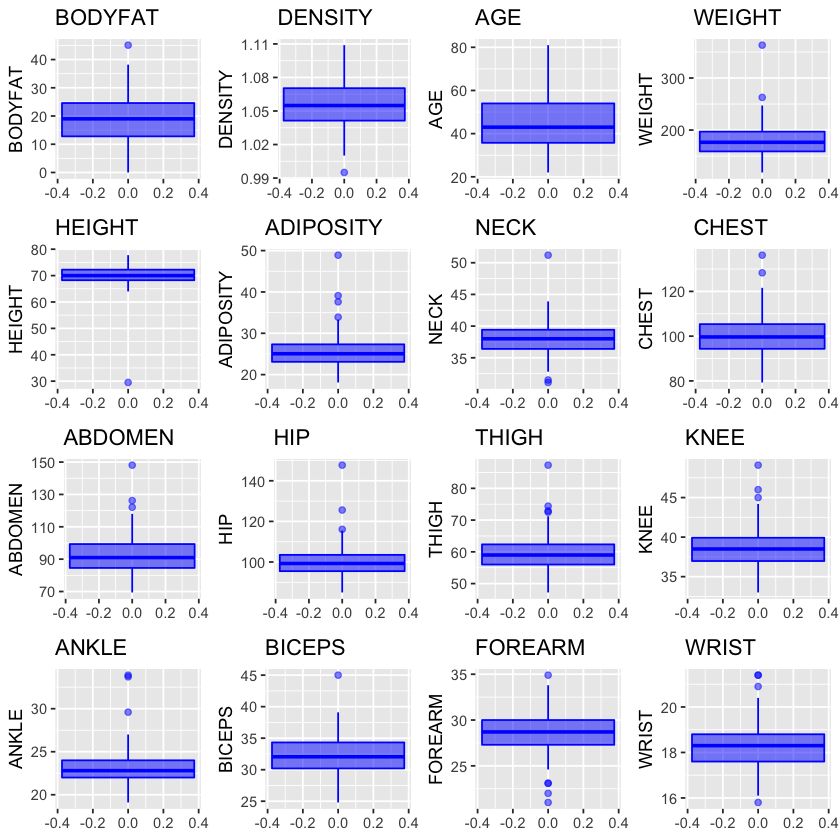

In [7]:
g1=ggplot(RawDataFrame,aes(x=BODYFAT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BODYFAT")
g2=ggplot(RawDataFrame,aes(x=DENSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("DENSITY")
g3=ggplot(RawDataFrame,aes(x=AGE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("AGE")
g4=ggplot(RawDataFrame,aes(x=WEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WEIGHT")
g5=ggplot(RawDataFrame,aes(x=HEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HEIGHT")
g6=ggplot(RawDataFrame,aes(x=ADIPOSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ADIPOSITY")
g7=ggplot(RawDataFrame,aes(x=NECK))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("NECK")
g8=ggplot(RawDataFrame,aes(x=CHEST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("CHEST")
g9=ggplot(RawDataFrame,aes(x=ABDOMEN))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ABDOMEN")
g10=ggplot(RawDataFrame,aes(x=HIP))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HIP")
g11=ggplot(RawDataFrame,aes(x=THIGH))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("THIGH")
g12=ggplot(RawDataFrame,aes(x=KNEE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("KNEE")
g13=ggplot(RawDataFrame,aes(x=ANKLE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ANKLE")
g14=ggplot(RawDataFrame,aes(x=BICEPS))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BICEPS")
g15=ggplot(RawDataFrame,aes(x=FOREARM))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("FOREARM")
g16=ggplot(RawDataFrame,aes(x=WRIST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WRIST")
grid.arrange(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, nrow = 4)
ggsave("Image/Boxplot_all.jpeg",g)

Our raw data should pass three levels of data clean process: First is boxplot, check any Null or abnormal value, Second, BODYFAT and DENSITY must meet Siri equation, Third, WEIGHT and HIGHT must meet BMI formula

### Outliers of Boxplot

There is no NULL value in our dataset. 

From boxplot we found the following outliers. The number after variables is theindex in BodyFat.csv from the boxplot of this variables

182 with BODYFAT 0, which is not shown in boxplot, reminding us to check the data again without boxplot to find outliers. 

BODYFAT: 216, 182

DENSITY: 216

AGE:

WEIGHT: 39, 41

HEIGHT: 42

ADIPOSITY: 39, 41, 216, 242

NECK: 39, 45, 106

CHEST: 39, 41

ABDOMEN: 39, 41, 216

HIP: 39, 41, 35

THIGH:39, 169, 152

KNEE: 39, 244, 192

ANKLE:31, 86, 39

BICEPS:39

FOREARM:159, 206, 45,226, 175

WRIST:41,39,252,226

182, his BODYFAT is 0, which is impossible, calculate his BODYFAT by Siri equation, his BODYFAT should be: -3.611687, which is also impossible, we decide to delete him.

216 has outstanding BODYFAT, check his weight, we define 216 as an extremely obesity case, we decide to delete him.

39 occurs too many time in boxplot, just like 216, he is also an obesity case with too many outliers value, we decide to delete him. 

42 whose HEIGHT is 29.5 inches (74.93 cm), which is too short, which can be fixed in BMI steps, the real HEIGHT is 69.4255 inches (176.34077 cm)

41 occurs too many time in boxplot, just like 39, he is also an obesity case with too many outliers value, we decide to delete him


In [8]:
FirstFilterData=data.frame(RawData[-c(182,216,39,41),])
FirstFilterData[FirstFilterData$IDNO==42,"HEIGHT"]=69.4255

In [9]:
dim(FirstFilterData)

[1] 248  17

### Outliers of Siri Equation

Siri Equation:

BODYFAT= 495/DENSITY - 450

pdf 
  2

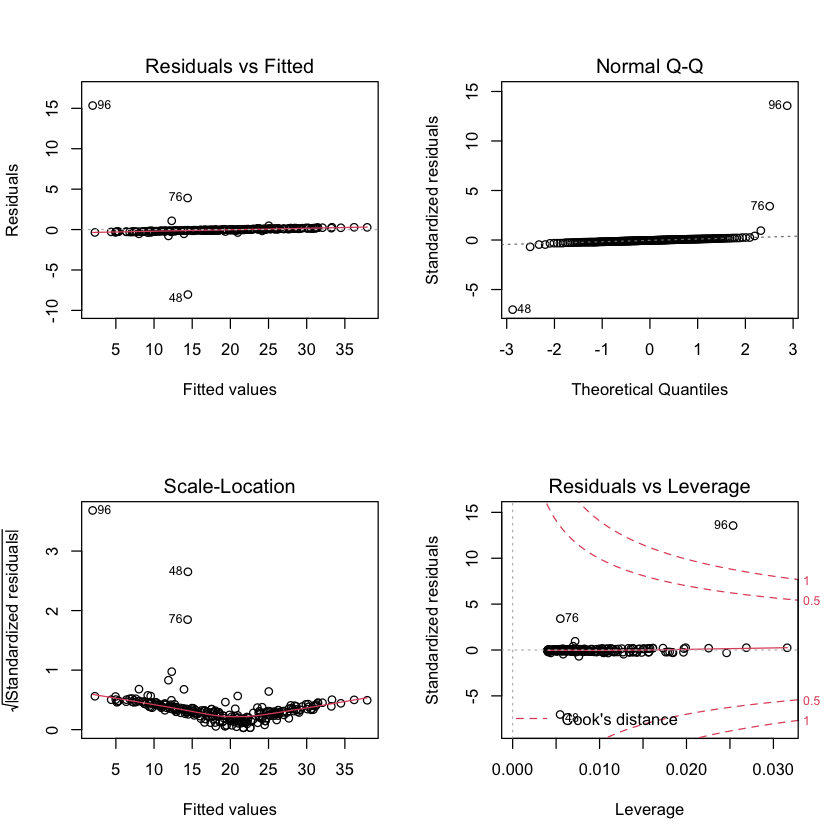

In [10]:
FirstFilterData[,"invDENSITY"]=1/FirstFilterData$DENSITY
SiriModel=lm(BODYFAT~invDENSITY,data=FirstFilterData)
par(mfrow=c(2,2)) 
plot(SiriModel)


jpeg(file="Image/Siri_Equation_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(SiriModel)
dev.off()

Saving 7 x 7 in image



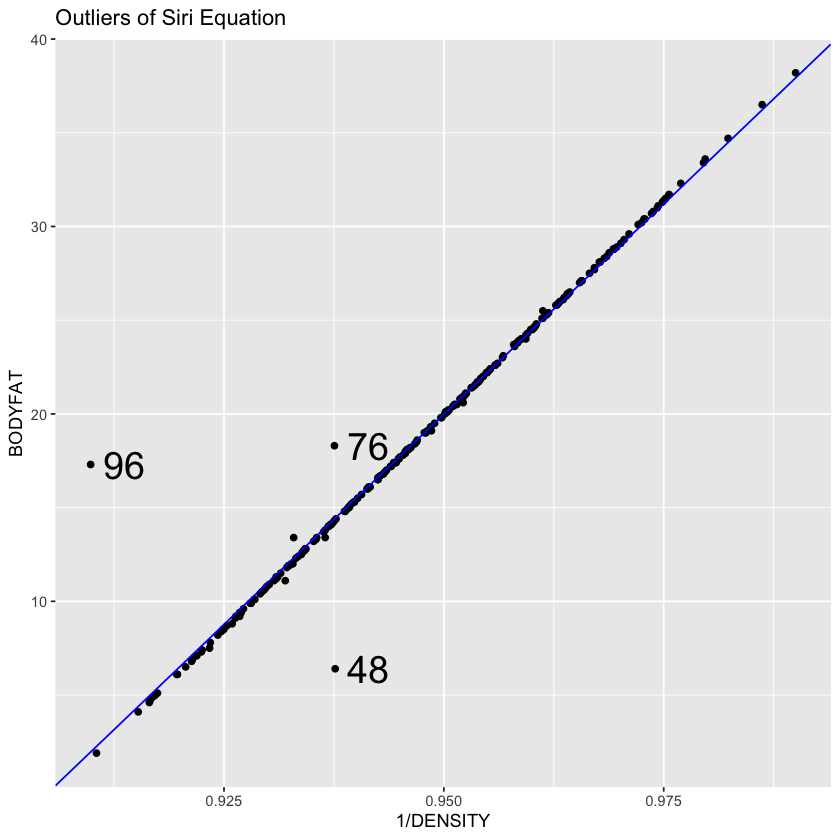

In [16]:
sirioutliers=FirstFilterData$IDNO %in% c(96, 48, 76)

g=ggplot(data=FirstFilterData)+geom_point(aes(x=invDENSITY,y=BODYFAT))+
geom_abline(intercept = SiriModel$coefficients[1],slope=SiriModel$coefficients[2],color="blue")+
xlab("1/DENSITY")+
ylab("BODYFAT")+
ggtitle("Outliers of Siri Equation")+
geom_text(data=FirstFilterData[sirioutliers,],aes(x=invDENSITY,y=BODYFAT,label=IDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_Siri_Equation.jpeg",g)
g


96, 76, 48's BODYFAT do not meet their DENSITY by Siri Equation, we decide to use the Siri equation calcualte their BODYFAT again and update.


In [17]:
for(i in c(96,76,48)){
  NewBODYFAT=495/FirstFilterData[FirstFilterData$IDNO==i,"DENSITY"]-450
  print(NewBODYFAT)
}

[1] 0.3684833
[1] 14.09151
[1] 14.13502


We found that the New BODYFAT of 96 is too small compared with other people, so we decide to use the his initial BODYFAT to update his DENSITY with Siri equation. BODYFAT of 48 also changed too high, but considering that BODYFAT is from DENSITY by Siri equation, we perfer to change BODYFAT first. 


In [18]:
SecondFilterData=FirstFilterData[,-which(names(FirstFilterData) %in% c("invDENSITY"))]
SecondFilterData[SecondFilterData$IDNO==48,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==48,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==76,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==76,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==96,"DENSITY"]=495/(SecondFilterData[SecondFilterData$IDNO==96,"BODYFAT"]+450)


### Outliers of BMI Equation

BMI equation:

BMI=WEIGHT(kg)/HEIGHT(m)^2=703*WEIGHT(lb)/HEIGHT(in)^2 from wikipedia

pdf 
  2

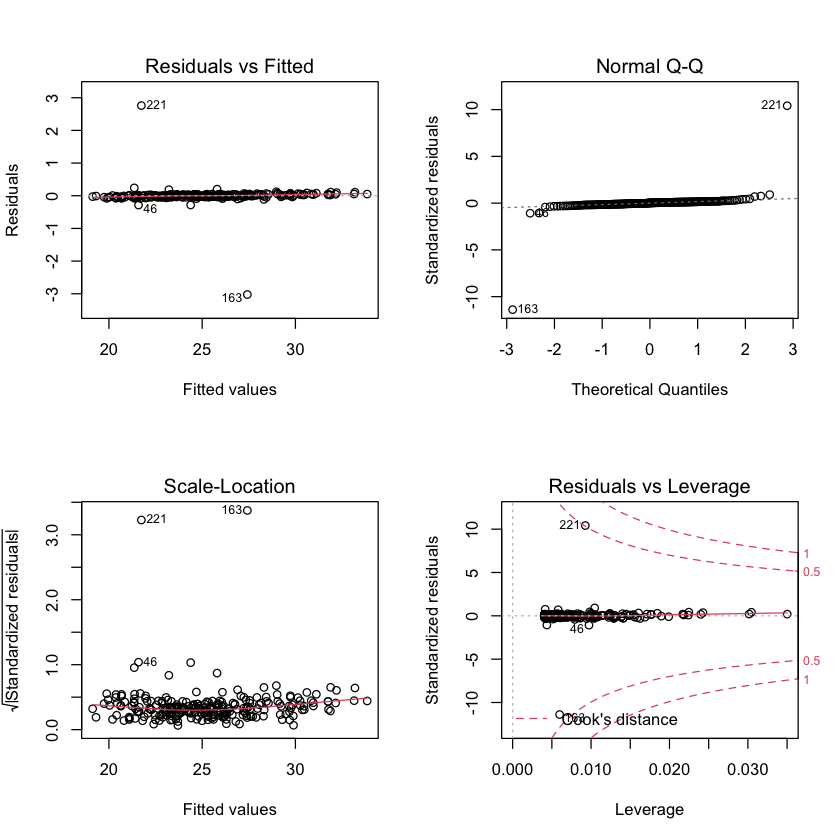

In [19]:
SecondFilterData[,"BMIX"]=(SecondFilterData$WEIGHT)/((SecondFilterData$HEIGHT)^2)
BMIModel=lm(ADIPOSITY~BMIX,data=SecondFilterData)
par(mfrow=c(2,2)) 
plot(BMIModel)
jpeg(file="Image/BMI_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(BMIModel)
dev.off()

Saving 7 x 7 in image



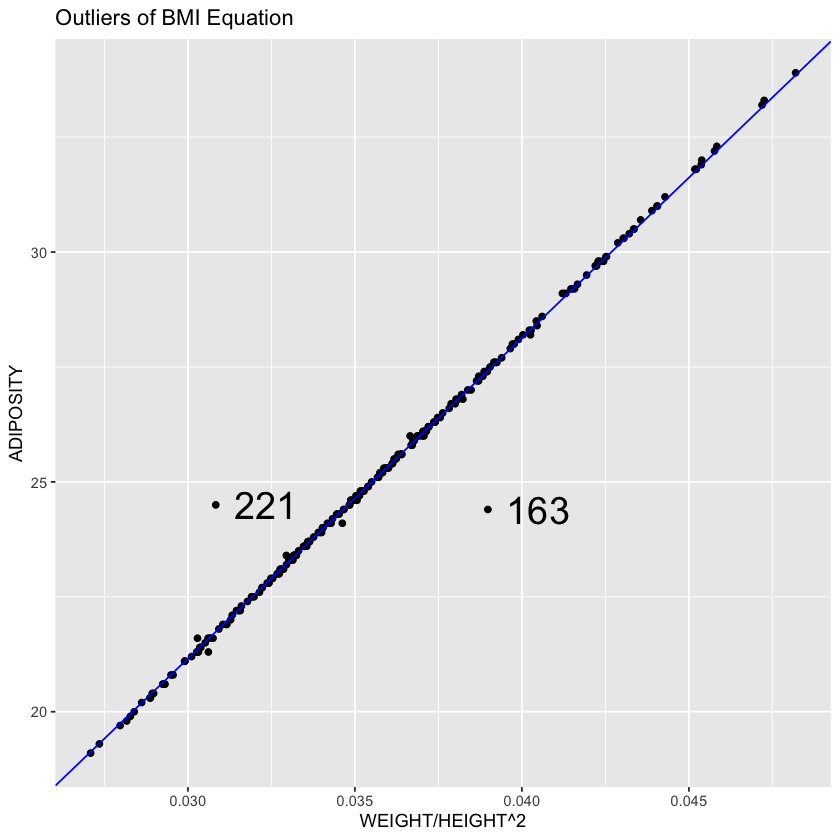

In [20]:
bmioutliers=SecondFilterData$IDNO %in% c(221, 163)

g=ggplot(data=SecondFilterData)+geom_point(aes(x=BMIX,y=ADIPOSITY))+
geom_abline(intercept = BMIModel$coefficients[1],slope=BMIModel$coefficients[2],color="blue")+
xlab("WEIGHT/HEIGHT^2")+
ylab("ADIPOSITY")+
ggtitle("Outliers of BMI Equation")+
geom_text(data=SecondFilterData[bmioutliers,],aes(x=BMIX,y=ADIPOSITY,label=IDNO),size = 8,hjust = -0.3)

ggsave("Image/Outliers_of_BMI_Equation.jpeg",g)

g

The two outliers is 221 and 163, their new BMI is:

In [21]:
for(i in c(163,221)){
  NewBMI=703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2)
  print(NewBMI)
}

[1] 27.40422
[1] 21.67592


No problem, update their new BMI:

In [22]:
CleanData=SecondFilterData[,-which(names(SecondFilterData) %in% c("BMIX"))]
CleanData[CleanData$IDNO==163,"ADIPOSITY"]=703*CleanData[CleanData$IDNO==163,"WEIGHT"]/(CleanData[CleanData$IDNO==i,"HEIGHT"]^2)
CleanData[CleanData$IDNO==221,"ADIPOSITY"]=703*CleanData[CleanData$IDNO==221,"WEIGHT"]/(CleanData[CleanData$IDNO==i,"HEIGHT"]^2)
CleanData=data.frame(CleanData)
dim(CleanData)

[1] 248  17

In [23]:
write.csv(CleanData,'Data/CleanData.csv',row.names = FALSE)

## Model Build

Input our CleanData, and we will not use DENSITY in our following steps

In [24]:
CleanData = read.csv("Data/CleanData.csv",sep=",")
WholeCleanData=CleanData
CleanData=CleanData[,-c(1,3)]
n=dim(CleanData)[1]
head(CleanData)

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


### Heat plot for correlation

pdf 
  2

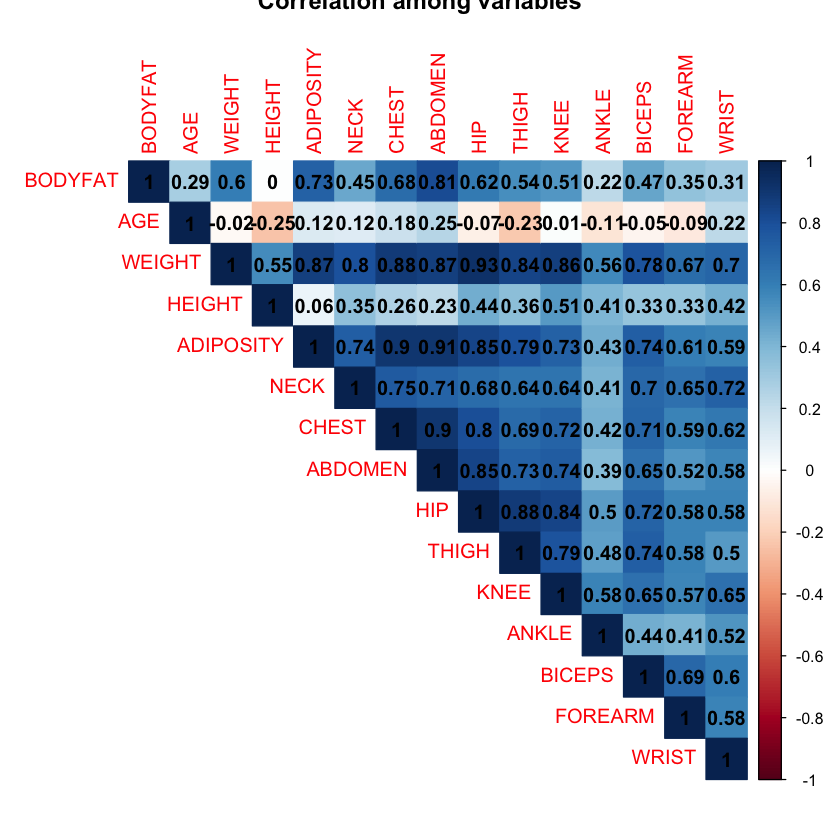

In [25]:
corr=cor(CleanData)
corrplot(corr,  
         type="upper", method="color",addCoef.col = "black",main='Correlation among variables')
jpeg(file="Image/Correlation_among_variables.jpeg")
corr=cor(CleanData)
corrplot(corr,  
         type="upper", method="color",addCoef.col = "black",main='Correlation among variables')
dev.off()

Most of variables are correlated, we will consider the simple model with as few variables as possible. 

### VIF test

We test the vif of the simple linear regression

In [26]:
SLR = lm(BODYFAT~.,data=CleanData) 
vif = car::vif(SLR) 
mean(vif) 
rbind(vif)

[1] 38.20134

,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
vif,2.26133,239.5286,58.94953,174.0286,3.830409,10.28722,11.10054,11.86879,7.142993,5.043589,1.788033,3.42845,2.38092,3.179817


Weight enjoys the largest VIF, and there exist serious multicollinearity in our data

### BOXCOX test

[1] 1.030303

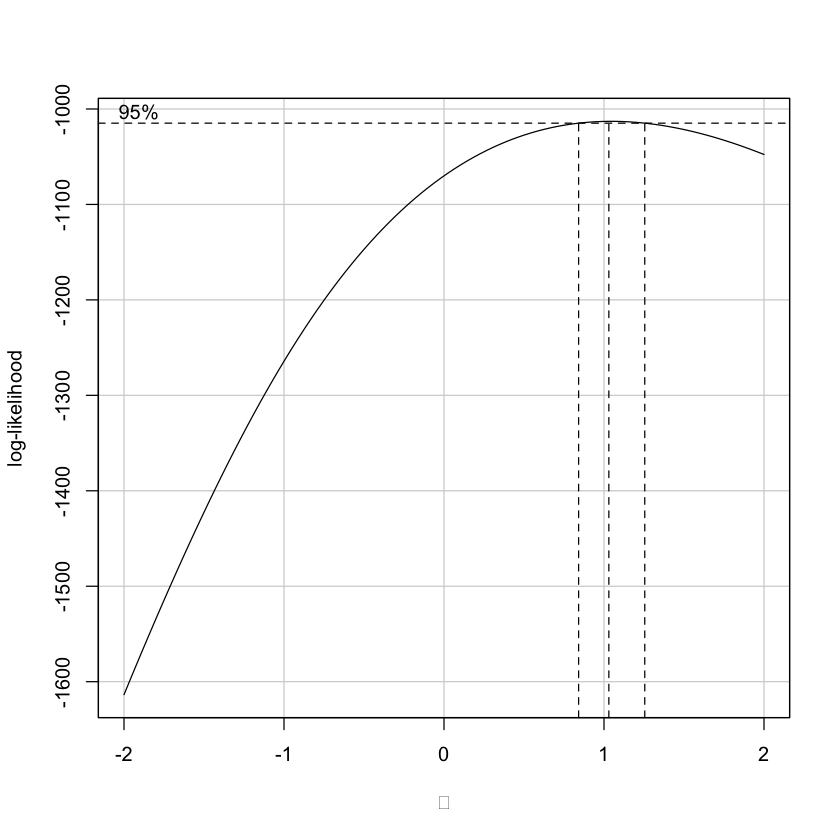

In [27]:
bc=boxCox(SLR)
lambda=bc$x[which(bc$y==max(bc$y))]
lambda

It seems that there is no necessary for transformation

### Simple linear regression of all variables

In [28]:
summary(SLR)


Call:
lm(formula = BODYFAT ~ ., data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6229 -2.8004 -0.1078  2.8045  9.0784 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -84.46820   52.20300  -1.618  0.10700    
AGE           0.06428    0.02935   2.190  0.02949 *  
WEIGHT       -0.25715    0.14600  -1.761  0.07950 .  
HEIGHT        1.09864    0.73415   1.496  0.13588    
ADIPOSITY     1.93503    1.04694   1.848  0.06583 .  
NECK         -0.38793    0.21530  -1.802  0.07286 .  
CHEST        -0.15379    0.10197  -1.508  0.13287    
ABDOMEN       0.81259    0.08458   9.608  < 2e-16 ***
HIP          -0.18243    0.13741  -1.328  0.18559    
THIGH         0.16862    0.13656   1.235  0.21816    
KNEE         -0.05853    0.24069  -0.243  0.80808    
ANKLE         0.11482    0.20300   0.566  0.57221    
BICEPS        0.13892    0.15789   0.880  0.37984    
FOREARM       0.22960    0.19076   1.204  0.22996    
WRIST        -1.53796    0.496

pdf 
  2

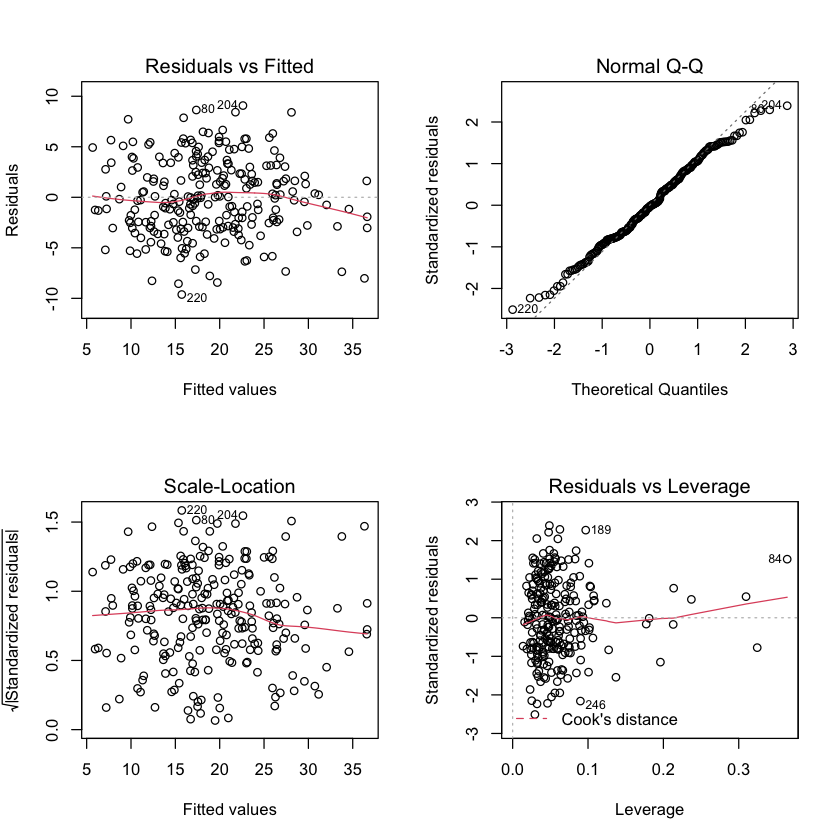

In [30]:
par(mfrow=c(2,2)) 
plot(SLR) 

jpeg(file="Image/Simple_Linear_Regression_Analysis.jpeg")
par(mfrow=c(2,2)) 
plot(SLR) 
dev.off()

### Variable selection-Lasso Regression

First we try use Lasso Regression to build model and select variables

In [31]:
x=as.matrix(CleanData[,-1])
y=CleanData$BODYFAT
model_lasso=glmnet(x, y, alpha = 1, family = "gaussian")
cv_lasso=cv.glmnet(x, y, alpha = 1, family = "gaussian")
lambda_lasso=cv_lasso$lambda.min
lambda_lasso
model=glmnet(x, y, alpha = 1, family = "gaussian",lambda=lambda_lasso)
model$beta

[1] 0.1205271

14 x 1 sparse Matrix of class "dgCMatrix"
                   s0
AGE        0.04168370
WEIGHT     .         
HEIGHT    -0.28032167
ADIPOSITY  .         
NECK      -0.22089021
CHEST      .         
ABDOMEN    0.69012550
HIP        .         
THIGH      0.02151834
KNEE       .         
ANKLE      .         
BICEPS     0.02220637
FOREARM    0.06154028
WRIST     -1.24613530

The final model will be BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + BICEPS + FOREARM + WRIST + THIGH. It seems that this model is very complex, we decide not to use them.

Although there is no necessary for transformation, we still want to try is there any space for model improvement when we use transformation. Because all variables is positive, we try use log and square transformation for all variables. 
    

In [32]:
LogAGE=log(CleanData$AGE)
LogWEIGHT=log(CleanData$WEIGHT)
LogHEIGHT=log(CleanData$HEIGHT)
LogADIPOSITY=log(CleanData$ADIPOSITY)
LogNECK=log(CleanData$NECK)
LogCHEST=log(CleanData$CHEST)
LogABDOMEN=log(CleanData$ABDOMEN)
LogHIP=log(CleanData$HIP)
LogTHIGH=log(CleanData$THIGH)
LogKNEE=log(CleanData$KNEE)
LogANKLE=log(CleanData$ANKLE)
LogBICEPS=log(CleanData$BICEPS)
LogFOREARM=log(CleanData$FOREARM)
LogWRIST=log(CleanData$WRIST)

sqAGE=CleanData$AGE^2
sqWEIGHT=CleanData$WEIGHT^2
sqHEIGHT=CleanData$HEIGHT^2
sqADIPOSITY=CleanData$ADIPOSITY^2
sqNECK=CleanData$NECK^2
sqCHEST=CleanData$CHEST^2
sqABDOMEN=CleanData$ABDOMEN^2
sqHIP=CleanData$HIP^2
sqTHIGH=CleanData$THIGH^2
sqKNEE=CleanData$KNEE^2
sqANKLE=CleanData$ANKLE^2
sqBICEPS=CleanData$BICEPS^2
sqFOREARM=CleanData$FOREARM^2
sqWRIST=CleanData$WRIST^2

ExtendData=cbind(CleanData,LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST
                 ,sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST)

SLR0=lm(BODYFAT~1,data=ExtendData)
SLR_Full=lm(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData)
SLR_Log_Full=lm(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData)
SLR_sq_Full=lm(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData)
SLR_All_Full=lm(BODYFAT~.,data=ExtendData)

### Variable selection-All possible subsets methods

All possible subsets methods with leaps package. First method to variables selection method is subsets methods


### No transformation

In [33]:
LeapsResults_Full=regsubsets(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData,nbest=1,method="exhaustive")
LeapsResults_Full_Table=cbind(summary(LeapsResults_Full)$which,summary(LeapsResults_Full)$rsq,summary(LeapsResults_Full)$rss,summary(LeapsResults_Full)$adjr2,summary(LeapsResults_Full)$cp,summary(LeapsResults_Full)$bic)
dimnames(LeapsResults_Full_Table)[[2]]=c(dimnames(summary(LeapsResults_Full)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Full_Table

,(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6610804,4575.124,0.6597027,57.837180,-257.3072
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7052744,3978.543,0.7028684,20.478633,-286.4439
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7168079,3822.850,0.7133260,12.207045,-290.8305
4,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7208570,3768.191,0.7162620,10.600974,-288.8885
5,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0.7243308,3721.297,0.7186352,9.507233,-286.4807
6,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0.7270697,3684.325,0.7202747,9.068027,-283.4436
7,1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0.7300337,3644.314,0.7221596,8.428344,-280.6382
8,1,1,0,0,1,1,1,1,1,0,0,0,0,1,1,0.7319480,3618.472,0.7229755,8.723482,-276.8895


First three model:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN+WEIGHT

BODYFAT~ABDOMEN+WEIGHT+WRIST

### log transformation

In [34]:
LeapsResults_Log=regsubsets(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData,nbest=1,method="exhaustive")
LeapsResults_Log_Table=cbind(summary(LeapsResults_Log)$which,summary(LeapsResults_Log)$rsq,summary(LeapsResults_Log)$rss,summary(LeapsResults_Log)$adjr2,summary(LeapsResults_Log)$cp,summary(LeapsResults_Log)$bic)
dimnames(LeapsResults_Log_Table)[[2]]=c(dimnames(summary(LeapsResults_Log)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Log_Table

,(Intercept),LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6609432,4576.975,0.6595649,56.112869,-257.2069
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.7031501,4007.218,0.7007269,20.753829,-284.6628
3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7197553,3783.062,0.7163097,8.055881,-293.4252
4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.7247425,3715.740,0.7202115,5.641590,-292.3648
5,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.7280731,3670.780,0.7224548,4.693520,-289.8705
6,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0.7310374,3630.765,0.7243412,4.069719,-287.0753
7,1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0.7328067,3606.880,0.7250135,4.503622,-283.1987
8,1,1,0,0,1,1,1,1,1,0,0,0,0,1,1,0.7346784,3581.613,0.7257974,4.846850,-279.4287


First three model:

BODYFAT~LogABDOMEN

BODYFAT~LogABDOMEN+LogWRIST

BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST

### Square transformation

In [35]:
LeapsResults_Square=regsubsets(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData,nbest=1,method="exhaustive")
LeapsResults_Square_Table=cbind(summary(LeapsResults_Square)$which,summary(LeapsResults_Square)$rsq,summary(LeapsResults_Square)$rss,summary(LeapsResults_Square)$adjr2,summary(LeapsResults_Square)$cp,summary(LeapsResults_Square)$bic)
dimnames(LeapsResults_Square_Table)[[2]]=c(dimnames(summary(LeapsResults_Square)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Square_Table

,(Intercept),sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6556157,4648.892,0.6542158,52.988192,-253.3404
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7016979,4026.822,0.6992628,15.248075,-283.4526
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7105030,3907.961,0.7069436,9.654815,-285.3697
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0.7146650,3851.777,0.7099682,8.065590,-283.4475
5,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0.7174477,3814.213,0.7116099,7.665851,-280.3646
6,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0.7208822,3767.850,0.7139332,6.704034,-277.8841
7,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0.7226074,3744.562,0.7145168,7.216303,-273.9083
8,1,1,1,0,0,1,0,1,0,1,0,0,1,1,1,0.7239301,3726.707,0.7146893,8.075625,-269.5802


First three model:

BODYFAT~sqABDOMEN

BODYFAT~sqABDOMEN+sqWEIGHT

BODYFAT~sqABDOMEN+sqWEIGHT+sqWRIST

### All variables

In [36]:
LeapsResults=regsubsets(BODYFAT~.,data=ExtendData,nbest=1,method="exhaustive")
LeapsResults_Table=cbind(summary(LeapsResults)$which,summary(LeapsResults)$rsq,summary(LeapsResults)$rss,summary(LeapsResults)$adjr2,summary(LeapsResults)$cp,summary(LeapsResults)$bic)
show(LeapsResults_Table)

  (Intercept) AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE
1           1   0      0      0         0    0     0       1   0     0    0
2           1   0      0      0         0    0     0       1   0     0    0
3           1   0      0      0         0    0     0       0   0     0    0
4           1   0      0      0         0    0     0       1   0     0    0
5           1   1      0      0         0    0     0       0   0     0    0
6           1   0      0      0         0    0     0       1   1     0    0
7           1   0      0      0         0    0     0       0   0     0    0
8           1   1      0      0         0    0     0       1   0     0    0
  ANKLE BICEPS FOREARM WRIST LogAGE LogWEIGHT LogHEIGHT LogADIPOSITY LogNECK
1     0      0       0     0      0         0         0            0       0
2     0      0       0     0      0         0         0            0       0
3     0      0       0     0      0         0         0            0       0
4     0 

First three model:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN + sqWEIGHT

BODYFAT~LogWRIST + sqWEIGHT + LogABDOMEN

### Variable selection-Forward directions

### No transformation with AIC

In [37]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    8924.0  4575.1 726.91
+ ADIPOSITY  1    7133.1  6366.0 808.83
+ CHEST      1    6216.5  7282.6 842.20
+ HIP        1    5117.7  8381.5 877.05
+ WEIGHT     1    4870.1  8629.1 884.27
+ THIGH      1    3944.0  9555.2 909.55
+ KNEE       1    3527.3  9971.8 920.13
+ BICEPS     1    2960.0 10539.1 933.86
+ NECK       1    2794.3 10704.8 937.72
+ FOREARM    1    1626.5 11872.7 963.40
+ WRIST      1    1271.2 12228.0 970.72
+ AGE        1    1129.7 12369.5 973.57
+ ANKLE      1     667.3 12831.9 982.67
<none>                   13499.1 993.24
+ HEIGHT     1       0.1 13499.1 995.24

Step:  AIC=726.91
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    596.58 3978.5 694.26
+ WRIST      1    530.01 4045.1 698.38
+ HEIGHT     1    476.40 4098.7 701.64
+ NECK       1    407.29 4167.8 705.79
+ HIP        1    251.67 4323.5 714.88
+ KNEE       1    245.93 4329.2 715.21
+ CHEST      1   


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + ADIPOSITY + 
    NECK + AGE + FOREARM + CHEST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST    ADIPOSITY         NECK  
  -12.87189      0.78634     -0.05343     -1.47596      0.51757     -0.34809  
        AGE      FOREARM        CHEST  
    0.05377      0.30468     -0.15347  


AIC=682.97

BODYFAT ~ ABDOMEN + WEIGHT + WRIST + ADIPOSITY + NECK + AGE + FOREARM + CHEST


### Log transformation with AIC

In [38]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

               Df Sum of Sq     RSS    AIC
+ LogABDOMEN    1    8922.2  4577.0 727.01
+ LogADIPOSITY  1    7127.1  6372.0 809.07
+ LogCHEST      1    6227.2  7271.9 841.83
+ LogHIP        1    5144.5  8354.7 876.25
+ LogWEIGHT     1    4955.9  8543.3 881.79
+ LogTHIGH      1    4012.7  9486.4 907.76
+ LogKNEE       1    3532.0  9967.1 920.02
+ LogBICEPS     1    3047.6 10451.6 931.79
+ LogNECK       1    2772.2 10727.0 938.24
+ LogFOREARM    1    1590.8 11908.3 964.15
+ LogWRIST      1    1261.5 12237.7 970.91
+ LogAGE        1    1123.3 12375.8 973.70
+ LogANKLE      1     751.8 12747.3 981.03
<none>                      13499.1 993.24
+ LogHEIGHT     1       0.2 13499.0 995.24

Step:  AIC=727.01
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWRIST      1    569.76 4007.2 696.04
+ LogWEIGHT     1    552.07 4024.9 697.13
+ LogHEIGHT     1    508.83 4068.1 699.78
+ LogNECK       1    433.80 4143.2 704.32
+ LogKNEE       1    252.01 4


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT + LogNECK + 
    LogAGE + LogFOREARM, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN     LogWRIST    LogHEIGHT      LogNECK       LogAGE  
    -91.450       68.874      -27.371      -22.327      -16.644        2.010  
 LogFOREARM  
      7.857  


AIC=679.57

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT + LogNECK + LogAGE + LogFOREARM

### Square transformation with AIC

In [39]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

              Df Sum of Sq     RSS    AIC
+ sqABDOMEN    1    8850.2  4648.9 730.88
+ sqADIPOSITY  1    7060.5  6438.7 811.65
+ sqCHEST      1    6176.9  7322.2 843.54
+ sqHIP        1    5074.5  8424.6 878.32
+ sqWEIGHT     1    4709.9  8789.3 888.83
+ sqTHIGH      1    3854.1  9645.1 911.87
+ sqKNEE       1    3510.9  9988.2 920.54
+ sqBICEPS     1    2851.5 10647.7 936.40
+ sqNECK       1    2803.5 10695.7 937.51
+ sqFOREARM    1    1636.6 11862.5 963.19
+ sqWRIST      1    1279.0 12220.1 970.56
+ sqAGE        1    1101.4 12397.8 974.14
+ sqANKLE      1     566.3 12932.9 984.62
<none>                     13499.1 993.24
+ sqHEIGHT     1       0.0 13499.1 995.24

Step:  AIC=730.88
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1    622.07 4026.8 697.25
+ sqWRIST      1    468.04 4180.9 706.56
+ sqHEIGHT     1    438.81 4210.1 708.29
+ sqNECK       1    353.57 4295.3 713.26
+ sqHIP        1    244.78 4404.1 719.46
+ sqKNEE  


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS, 
    data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqWRIST     sqBICEPS  
 -5.3667833    0.0047368   -0.0003115   -0.0322996    0.0041063  


AIC=690.23

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS


### All transformation with AIC

In [40]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

               Df Sum of Sq     RSS    AIC
+ ABDOMEN       1    8924.0  4575.1 726.91
+ LogABDOMEN    1    8922.2  4577.0 727.01
+ sqABDOMEN     1    8850.2  4648.9 730.88
+ ADIPOSITY     1    7133.1  6366.0 808.83
+ LogADIPOSITY  1    7127.1  6372.0 809.07
+ sqADIPOSITY   1    7060.5  6438.7 811.65
+ LogCHEST      1    6227.2  7271.9 841.83
+ CHEST         1    6216.5  7282.6 842.20
+ sqCHEST       1    6176.9  7322.2 843.54
+ LogHIP        1    5144.5  8354.7 876.25
+ HIP           1    5117.7  8381.5 877.05
+ sqHIP         1    5074.5  8424.6 878.32
+ LogWEIGHT     1    4955.9  8543.3 881.79
+ WEIGHT        1    4870.1  8629.1 884.27
+ sqWEIGHT      1    4709.9  8789.3 888.83
+ LogTHIGH      1    4012.7  9486.4 907.76
+ THIGH         1    3944.0  9555.2 909.55
+ sqTHIGH       1    3854.1  9645.1 911.87
+ LogKNEE       1    3532.0  9967.1 920.02
+ KNEE          1    3527.3  9971.8 920.13
+ sqKNEE        1    3510.9  9988.2 920.54
+ LogBICEPS     1    3


Call:
lm(formula = BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST + LogADIPOSITY + 
    LogNECK + LogBICEPS + sqBICEPS + AGE + CHEST + sqNECK + sqFOREARM, 
    data = ExtendData)

Coefficients:
 (Intercept)       ABDOMEN      sqWEIGHT      LogWRIST  LogADIPOSITY  
   1.190e+02     7.832e-01    -1.542e-04    -3.094e+01     1.121e+01  
     LogNECK     LogBICEPS      sqBICEPS           AGE         CHEST  
  -1.029e+02     7.425e+01    -3.348e-02     5.801e-02    -1.433e-01  
      sqNECK     sqFOREARM  
   3.170e-02     4.679e-03  


AIC=676.74

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST + LogADIPOSITY + LogNECK + LogBICEPS + sqBICEPS + AGE + CHEST + sqNECK + sqFOREARM

### No transformation with BIC

In [41]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

            Df Sum of Sq     RSS     AIC
+ ABDOMEN    1    8924.0  4575.1  733.94
+ ADIPOSITY  1    7133.1  6366.0  815.86
+ CHEST      1    6216.5  7282.6  849.22
+ HIP        1    5117.7  8381.5  884.07
+ WEIGHT     1    4870.1  8629.1  891.29
+ THIGH      1    3944.0  9555.2  916.58
+ KNEE       1    3527.3  9971.8  927.16
+ BICEPS     1    2960.0 10539.1  940.88
+ NECK       1    2794.3 10704.8  944.75
+ FOREARM    1    1626.5 11872.7  970.43
+ WRIST      1    1271.2 12228.0  977.74
+ AGE        1    1129.7 12369.5  980.60
+ ANKLE      1     667.3 12831.9  989.70
<none>                   13499.1  996.76
+ HEIGHT     1       0.1 13499.1 1002.27

Step:  AIC=733.94
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    596.58 3978.5 704.80
+ WRIST      1    530.01 4045.1 708.92
+ HEIGHT     1    476.40 4098.7 712.18
+ NECK       1    407.29 4167.8 716.33
+ HIP        1    251.67 4323.5 725.42
+ KNEE       1    245.93 4329.2 725.75
+


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST  
  -24.22925      0.87792     -0.08384     -1.26116  


BIC=700.41

BODYFAT ~ ABDOMEN + WEIGHT + WRIST

### Log transformation with BIC

In [42]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    8922.2  4577.0  734.04
+ LogADIPOSITY  1    7127.1  6372.0  816.09
+ LogCHEST      1    6227.2  7271.9  848.86
+ LogHIP        1    5144.5  8354.7  883.28
+ LogWEIGHT     1    4955.9  8543.3  888.82
+ LogTHIGH      1    4012.7  9486.4  914.79
+ LogKNEE       1    3532.0  9967.1  927.04
+ LogBICEPS     1    3047.6 10451.6  938.81
+ LogNECK       1    2772.2 10727.0  945.26
+ LogFOREARM    1    1590.8 11908.3  971.17
+ LogWRIST      1    1261.5 12237.7  977.94
+ LogAGE        1    1123.3 12375.8  980.72
+ LogANKLE      1     751.8 12747.3  988.06
<none>                      13499.1  996.76
+ LogHEIGHT     1       0.2 13499.0 1002.27

Step:  AIC=734.04
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWRIST      1    569.76 4007.2 706.58
+ LogWEIGHT     1    552.07 4024.9 707.67
+ LogHEIGHT     1    508.83 4068.1 710.32
+ LogNECK       1    433.80 4143.2 714.86
+ LogKNEE    


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN     LogWRIST    LogHEIGHT  
     -79.24        67.16       -28.93       -28.56  


BIC=697.82

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT

### Square transformation with BIC

In [43]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

              Df Sum of Sq     RSS     AIC
+ sqABDOMEN    1    8850.2  4648.9  737.90
+ sqADIPOSITY  1    7060.5  6438.7  818.68
+ sqCHEST      1    6176.9  7322.2  850.57
+ sqHIP        1    5074.5  8424.6  885.35
+ sqWEIGHT     1    4709.9  8789.3  895.86
+ sqTHIGH      1    3854.1  9645.1  918.90
+ sqKNEE       1    3510.9  9988.2  927.57
+ sqBICEPS     1    2851.5 10647.7  943.42
+ sqNECK       1    2803.5 10695.7  944.54
+ sqFOREARM    1    1636.6 11862.5  970.22
+ sqWRIST      1    1279.0 12220.1  977.58
+ sqAGE        1    1101.4 12397.8  981.16
+ sqANKLE      1     566.3 12932.9  991.64
<none>                     13499.1  996.76
+ sqHEIGHT     1       0.0 13499.1 1002.27

Step:  AIC=737.9
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1    622.07 4026.8 707.79
+ sqWRIST      1    468.04 4180.9 717.10
+ sqHEIGHT     1    438.81 4210.1 718.83
+ sqNECK       1    353.57 4295.3 723.80
+ sqHIP        1    244.78 4404.1 73


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqWRIST  
  -3.621745     0.004695    -0.000248    -0.029718  


BIC=705.87

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST

### All transformation with BIC

In [44]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ ABDOMEN       1    8924.0  4575.1  733.94
+ LogABDOMEN    1    8922.2  4577.0  734.04
+ sqABDOMEN     1    8850.2  4648.9  737.90
+ ADIPOSITY     1    7133.1  6366.0  815.86
+ LogADIPOSITY  1    7127.1  6372.0  816.09
+ sqADIPOSITY   1    7060.5  6438.7  818.68
+ LogCHEST      1    6227.2  7271.9  848.86
+ CHEST         1    6216.5  7282.6  849.22
+ sqCHEST       1    6176.9  7322.2  850.57
+ LogHIP        1    5144.5  8354.7  883.28
+ HIP           1    5117.7  8381.5  884.07
+ sqHIP         1    5074.5  8424.6  885.35
+ LogWEIGHT     1    4955.9  8543.3  888.82
+ WEIGHT        1    4870.1  8629.1  891.29
+ sqWEIGHT      1    4709.9  8789.3  895.86
+ LogTHIGH      1    4012.7  9486.4  914.79
+ THIGH         1    3944.0  9555.2  916.58
+ sqTHIGH       1    3854.1  9645.1  918.90
+ LogKNEE       1    3532.0  9967.1  927.04
+ KNEE          1    3527.3  9971.8  927.16
+ sqKNEE        1    3510.9  9988.2  927.57



Call:
lm(formula = BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN     sqWEIGHT     LogWRIST  
  1.132e+01    8.856e-01   -2.402e-04   -2.288e+01  


BIC=697.68

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST

As you can see, the BIC can give more simple and better model. Therefore we will consider some alternative model and their simplify version:

We consider the ABDOMEN as the most important variables and WEIGHT as the second one. 

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST

BODYFAT ~ ABDOMEN + sqWEIGHT

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST

BODYFAT ~ sqABDOMEN + sqWEIGHT

BODYFAT ~ sqABDOMEN

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT

BODYFAT ~ LogABDOMEN + LogWRIST

BODYFAT ~ LogABDOMEN

BODYFAT ~ ABDOMEN + WEIGHT + WRIST

BODYFAT ~ ABDOMEN + WEIGHT

BODYFAT ~ ABDOMEN

### Model selection-Cross Validation

Therefore, we will use cross validation method to select the best model for our final model. We will use 20-repeated 10-fold cross-validation, because there is only more than 200 data, if we use only 10-fold cross-validation, the output will vibrate. 

In [45]:
set.seed(1) 
train.control <- trainControl(method = "repeatedcv", number = 10, repeats=20)

model1=train(BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable=model1$results[c(2,3)]

model2=train(BODYFAT ~ ABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[2,]=model2$results[c(2,3)]

model3=train(BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[3,]=model3$results[c(2,3)]

model4=train(BODYFAT ~ sqABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[4,]=model4$results[c(2,3)]

model5=train(BODYFAT ~ sqABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[5,]=model5$results[c(2,3)]

model6=train(BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[6,]=model6$results[c(2,3)]

model7=train(BODYFAT ~ LogABDOMEN + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[7,]=model7$results[c(2,3)]

model8=train(BODYFAT ~ LogABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[8,]=model8$results[c(2,3)]

model9=train(BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[9,]=model9$results[c(2,3)]

model10=train(BODYFAT ~ ABDOMEN + WEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[10,]=model10$results[c(2,3)]

model11=train(BODYFAT ~ ABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[11,]=model11$results[c(2,3)]

ColModel=c("BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST","BODYFAT ~ ABDOMEN + sqWEIGHT","BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST","BODYFAT ~ sqABDOMEN + sqWEIGHT","BODYFAT ~ sqABDOMEN","BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT","BODYFAT ~ LogABDOMEN + LogWRIST","BODYFAT ~ LogABDOMEN","BODYFAT ~ ABDOMEN + WEIGHT + WRIST","BODYFAT ~ ABDOMEN + WEIGHT","BODYFAT ~ ABDOMEN")

In [46]:
CrossValidationTable=cbind(ColModel,CrossValidationTable)
colnames(CrossValidationTable)=c("Model","Root Mean Squared Error, RMSE","R-squared, R2")
CrossValidationTable

,Model,"Root Mean Squared Error, RMSE","R-squared, R2"
,<chr>,<dbl>,<dbl>
1,BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST,3.939160,0.7254679
2,BODYFAT ~ ABDOMEN + sqWEIGHT,4.004799,0.7119184
3,BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST,4.004185,0.7173313
4,BODYFAT ~ sqABDOMEN + sqWEIGHT,4.047335,0.7086961
5,BODYFAT ~ sqABDOMEN,4.330248,0.6648296
6,BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT,3.941639,0.7239889
7,BODYFAT ~ LogABDOMEN + LogWRIST,4.035166,0.7075023
8,BODYFAT ~ LogABDOMEN,4.284549,0.6693399
9,BODYFAT ~ ABDOMEN + WEIGHT + WRIST,3.962274,0.7217524


Therefore, among three best model, 1, 6, and 9, we choose 9 as our final model, it seems that there is no necessary for transformation. 

## Model diagnosis

In [47]:
CleanData = read.csv("Data/CleanData.csv",sep=",")
FinalModel=lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData) 

In [48]:
summary(FinalModel)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9974 -2.8917 -0.3257  2.9782  9.2271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.22925    6.27922  -3.859 0.000146 ***
ABDOMEN       0.87792    0.05210  16.851  < 2e-16 ***
WEIGHT       -0.08384    0.02226  -3.766 0.000208 ***
WRIST        -1.26116    0.40007  -3.152 0.001822 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.958 on 244 degrees of freedom
Multiple R-squared:  0.7168,	Adjusted R-squared:  0.7133 
F-statistic: 205.9 on 3 and 244 DF,  p-value: < 2.2e-16


Our final model:

BODYFAT=0.87792 ABDOMEN-0.08384 WEIGHT-1.26116 WRIST

All coefficients are significant.

And the 95% CI for coefficient is:



In [49]:
confint(FinalModel)

,2.5 %,97.5 %
(Intercept),-36.5976496,-11.8608572
ABDOMEN,0.7752994,0.9805458
WEIGHT,-0.1276779,-0.0399922
WRIST,-2.0491964,-0.4731317


In [50]:
vif = car::vif(FinalModel) 
mean(vif) 
vif


[1] 3.819638

ABDOMEN   WEIGHT    WRIST 
4.075237 5.385934 1.997742

There is no serious multicollinearity

### Standardized Residuals

Saving 7 x 7 in image



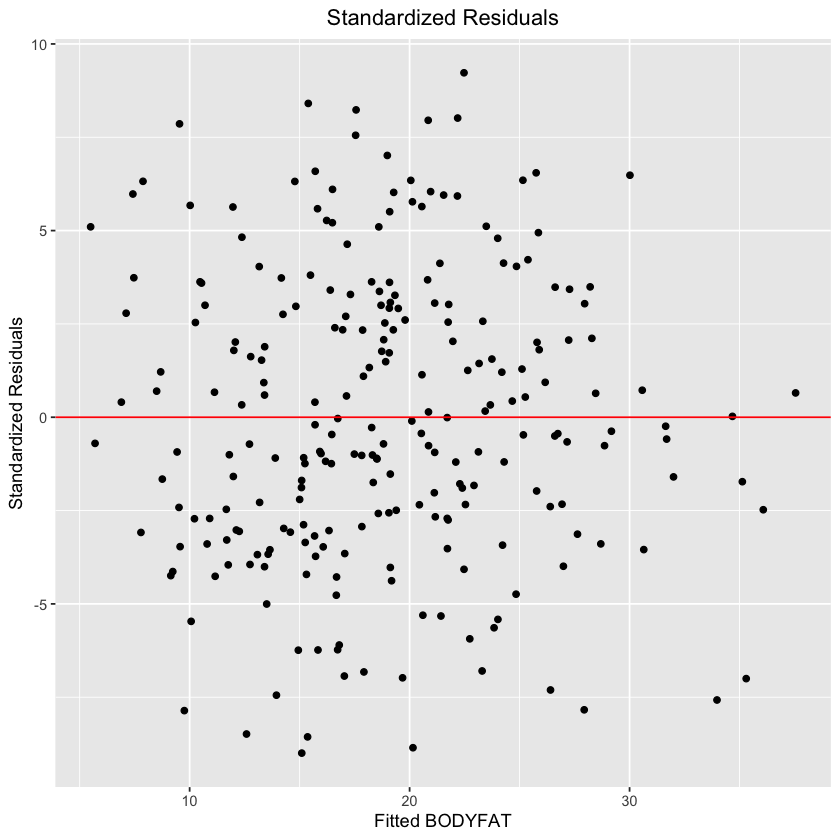

In [51]:

g=ggplot()+
geom_point(aes(x=predict(FinalModel),resid(FinalModel)))+
xlab("Fitted BODYFAT")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept = 0,color="red")
ggsave("Image/Final_Model_Standardized_Residuals.jpeg",g)
g

### QQ plot for residual 

pdf 
  2

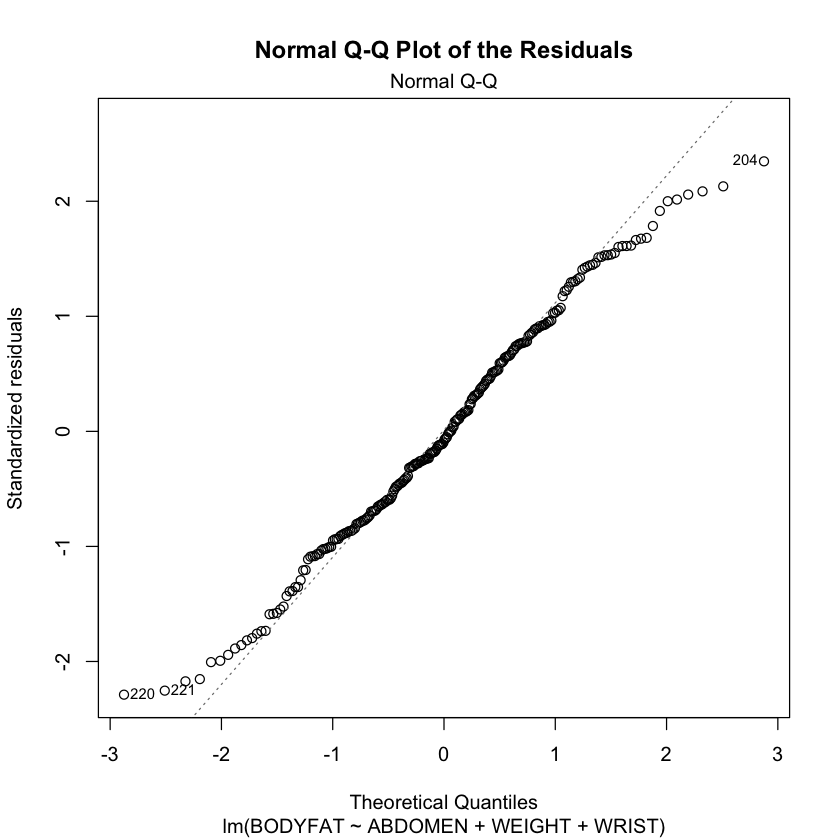

In [60]:
plot(FinalModel, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="Image/Final_Model_QQPLOT.jpeg")
plot(FinalModel, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

The normality perform well in our model

### Leverage Plots

Saving 7 x 7 in image



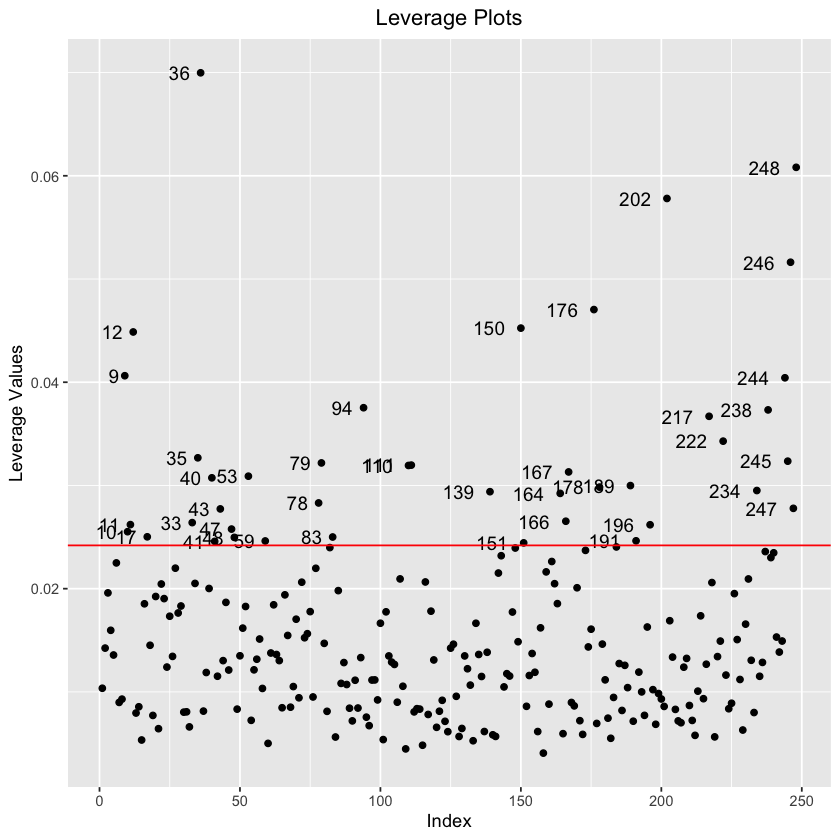

In [52]:
p=3
n=dim(CleanData)[1]
outliers=which(hatvalues(FinalModel)>2*p/n)
g=ggplot()+
geom_point(aes(x=1:n, hatvalues(FinalModel)))+
geom_text(aes(x=outliers,y=hatvalues(FinalModel)[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("Leverage Values")+
ggtitle("Leverage Plots")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =2*p/n,color="red")
ggsave("Image/Final_Model_Leverage_Plots.jpeg",g)
g

There is a lot of outliers from Leverage plots, but if you try to build a new model for dataset without outliers, there is almost no difference between the new and old models. So we decide to keep the initial model.

In [158]:
FinalModel2=lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData[-outliers,]) 

In [159]:
summary(FinalModel2)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData[-outliers, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1232 -2.9049 -0.2279  2.8507  9.6563 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.61549    6.70640  -4.416 1.64e-05 ***
ABDOMEN       0.85954    0.05669  15.163  < 2e-16 ***
WEIGHT       -0.08184    0.02406  -3.402 0.000807 ***
WRIST        -0.89393    0.42952  -2.081 0.038673 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.834 on 202 degrees of freedom
Multiple R-squared:  0.7292,	Adjusted R-squared:  0.7252 
F-statistic: 181.3 on 3 and 202 DF,  p-value: < 2.2e-16


### Cook's distance

Saving 7 x 7 in image



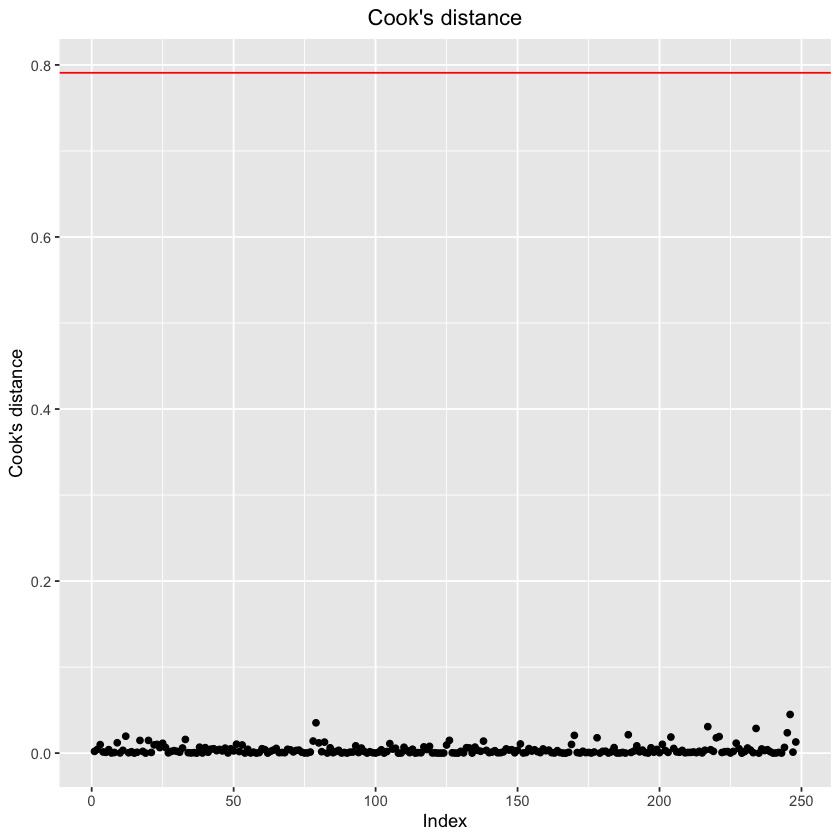

In [53]:
p=3
n=dim(CleanData)[1]
cooki=cooks.distance(FinalModel)
outliers=which(cooki>qf(0.5, p, n-p))
g=ggplot()+
geom_point(aes(x=1:n, y=cooki))+
geom_text(aes(x=outliers,y=cooki[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("Cook's distance")+
ggtitle("Cook's distance")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =qf(0.5, p, n-p),color="red")
ggsave("Image/Final_Model_Cooks_distance.jpeg",g)
g

No outliers from Cook's distance plot. 

### DFFITS

Saving 7 x 7 in image



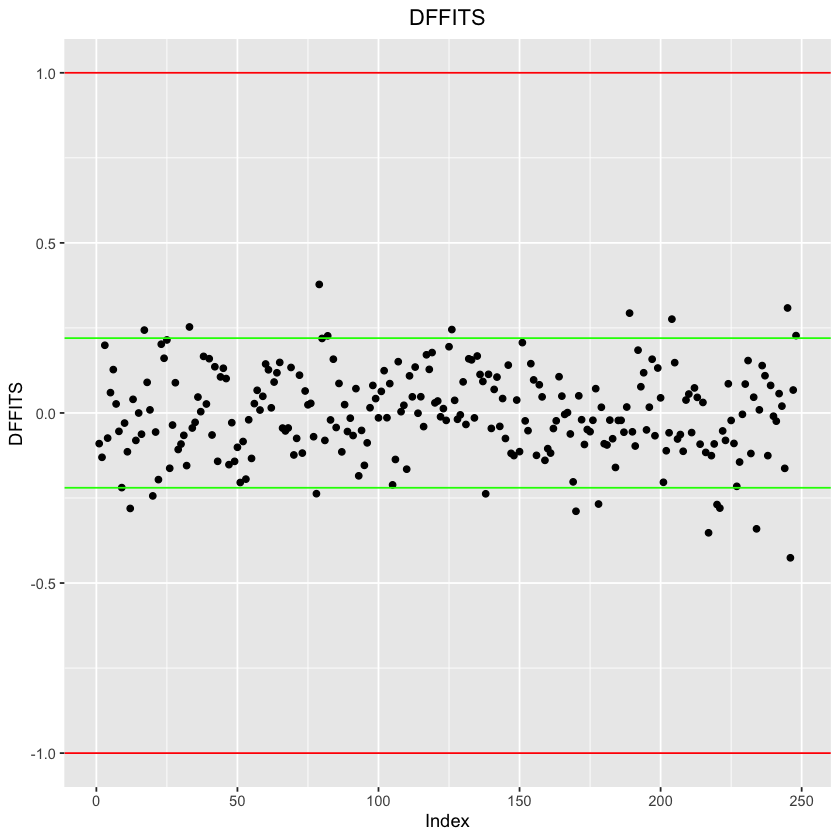

In [54]:
p=3
n=dim(CleanData)[1]
DFFITS=dffits(FinalModel)
outliers=which(abs(DFFITS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFFITS))+
geom_text(aes(x=outliers,y=DFFITS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DFFITS")+
ggtitle("DFFITS")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2*sqrt(p/n),color="green")+
geom_hline(yintercept =-2*sqrt(p/n),color="green")
ggsave("Image/Final_Model_DFFITS.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFFITS.

### DEBETAS

Saving 7 x 7 in image



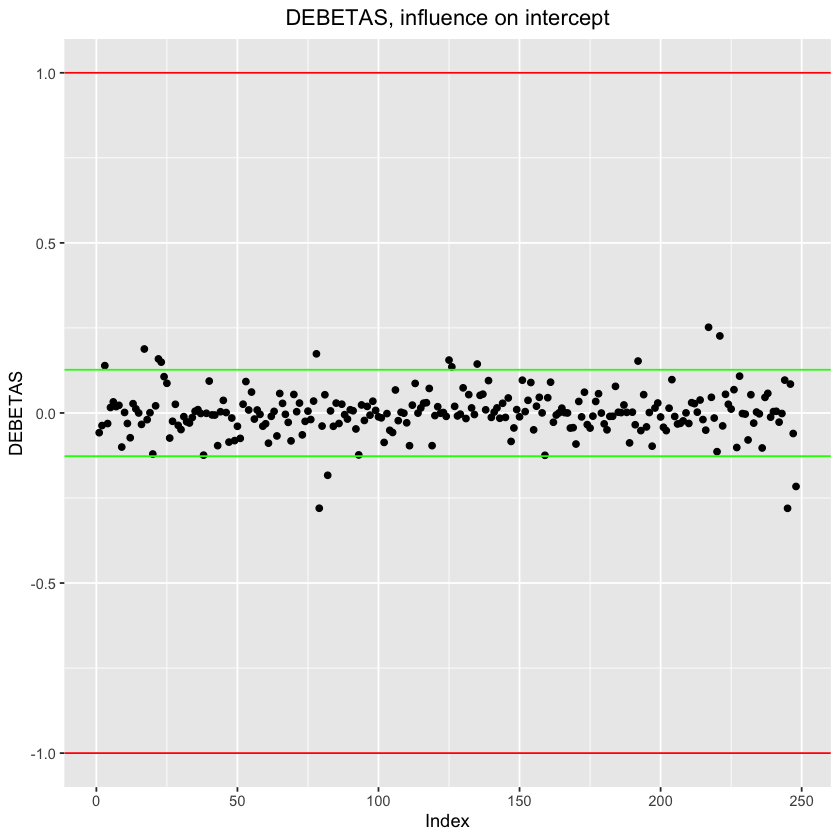

In [55]:
p=3
n=dim(CleanData)[1]
DEBETAS=dfbetas(FinalModel)
outliers=which(abs(DEBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DEBETAS[,1]))+
geom_text(aes(x=outliers,y=DEBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DEBETAS")+
ggtitle("DEBETAS, influence on intercept")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DEBETAS_influence_on_intercept.jpeg",g)
g

Saving 7 x 7 in image



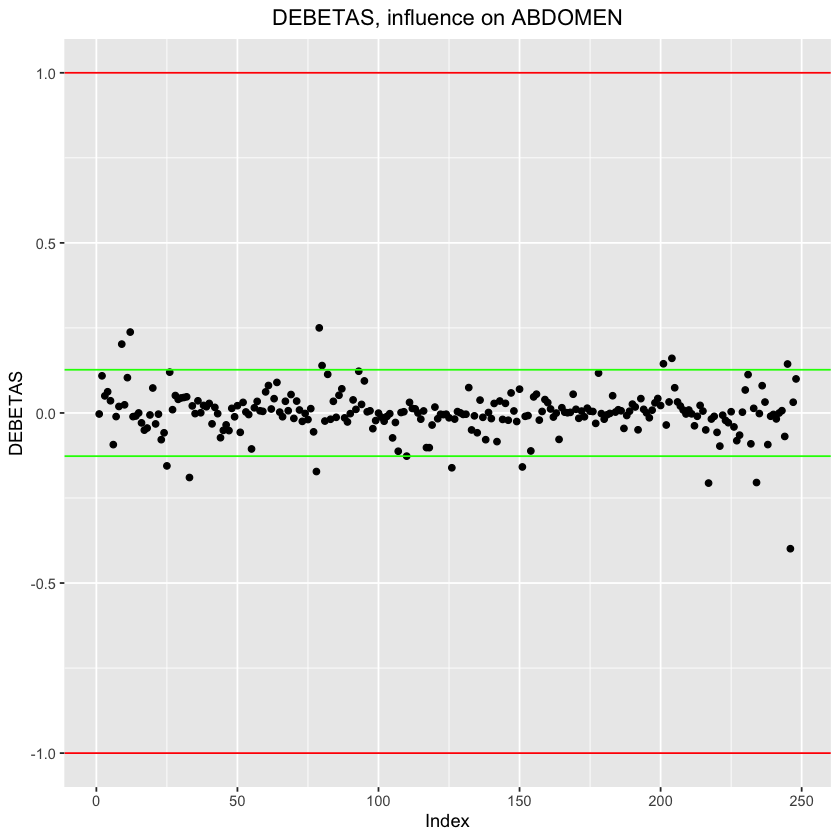

In [57]:
p=3
n=dim(CleanData)[1]
DEBETAS=dfbetas(FinalModel)
outliers=which(abs(DEBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DEBETAS[,2]))+
geom_text(aes(x=outliers,y=DEBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DEBETAS")+
ggtitle("DEBETAS, influence on ABDOMEN")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DEBETAS_influence_on_ABDOMEN.jpeg",g)
g

Saving 7 x 7 in image



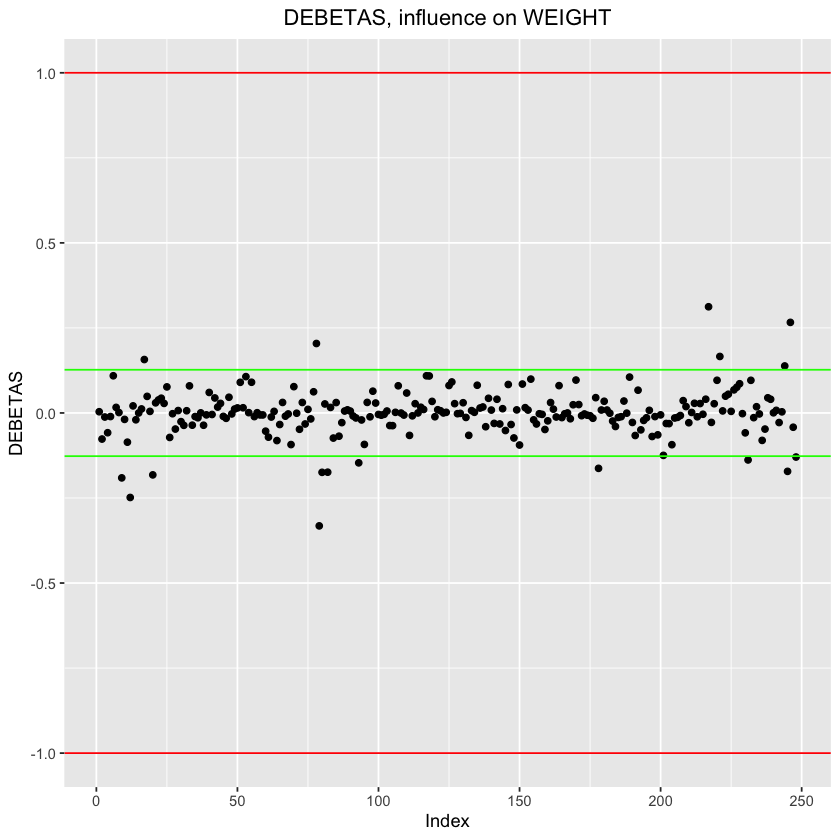

In [58]:
p=3
n=dim(CleanData)[1]
DEBETAS=dfbetas(FinalModel)
outliers=which(abs(DEBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DEBETAS[,3]))+
geom_text(aes(x=outliers,y=DEBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DEBETAS")+
ggtitle("DEBETAS, influence on WEIGHT")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DEBETAS_influence_on_WEIGHT.jpeg",g)
g

Saving 7 x 7 in image



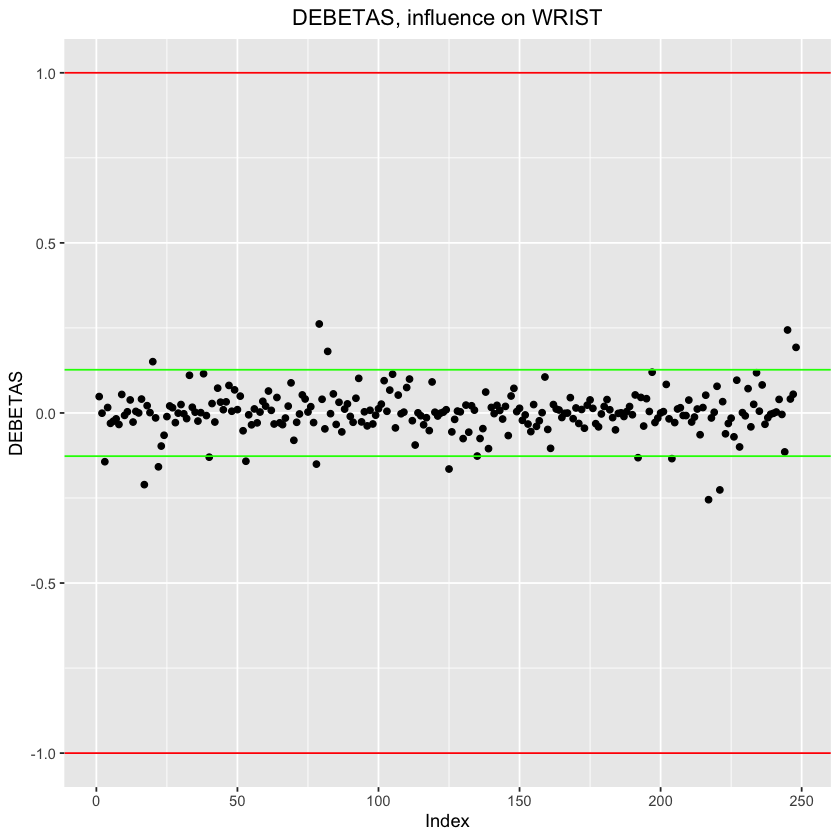

In [59]:
p=3
n=dim(CleanData)[1]
DEBETAS=dfbetas(FinalModel)
outliers=which(abs(DEBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DEBETAS[,4]))+
geom_text(aes(x=outliers,y=DEBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DEBETAS")+
ggtitle("DEBETAS, influence on WRIST")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DEBETAS_influence_on_WRIST.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DEBETAS.

## Conclusion:

Therefore our final model is:

BODYFAT=0.87792 ABDOMEN-0.08384 WEIGHT-1.26116 WRIST